בס"ד

# שער 1

## שם בית ספר

עירוני ד

## שם התלמיד + ת"ז

## שם המחקר

מציאת אנשים שיעזבו וישארו בעבודה

## שנת לימודים

תשפ"ד, 2024

## שם המורה

איתי בארלי

# נושא המחקר 2

## תיאור של מטרת המחקר

בטבלה יש מידע על עובדים בחברה ומטרת הסיווג היא אם עובד יעזוב את החברה או לא

## תמונה

<div dir="rtl">
<img src="pics/illustration.png" width="500" />
</div>

## מסגרת הפרויקט

תחרות למידת מכונה שבה יש שני בעלי תפקידים מנהל התחרות והמתחרה. התפקיד של המנהל הוא קודם כל לטפל בטבלה זאת אומרת לבדוק אם יש שורות חסרות ואם יש ערכים חסרים בעמודת המטרה ולטפל בהתאם וגם הוא מפצל אותה לטבלת אימון ואימות. המתחרה מקבל רק את טבלת האימון ואין לי גישה לאימות. המתחרה מסווג לפי החלק של האימון ומעביר את המודל למנהל. המנהל באמצעות המודל מסווג את טבלת הבדיקה ומשווה בין תחזיות האמת

# תיאור הנתונים 3

## 3.1 תיאור קצר של מאגר הנתונים

מאגר המידע הזה מכיל נתונים על אנשי הצוות בחברה, כולל פרטי השכלה, תחום התעסוקה,


מאפיינים דמוגרפיים ופרמטרים אחרים הקשורים לעובדים.




## .3.2 פירוט על מקור הנתונים:


הטבלה נלקחה מקאגל והועלתה לשם על ידי תאופיק אל-מטוואלי לא כתוב מי יוצר הטבלה. התאריך האחרון שעודכנה בו הוא לפני 8 חודשים

## קישור למאגר הנתונים 3.3

## .3.4 פירוט על סוגי הנתונים במאגר:

יש 4653 שורות 9 עמודות. יש 3 עמודות נומריות 4 קטגוריאליות שאחת מהן מספרית. שתי בולאניות אחת עם ערכים של כן או לא ואחת עם 0 ו 1

1. Education- ההשכלה שלהם תואר ראשון שני או דוקטורט
2. Joining year- השנה שבה הם הצטרפו לחברה
3. City-  העיר שבה העובד עובד
4. Payment tier- דרגת שכר של העובד ככל שיותר גבוהה הוא מרוויח
יותר
5. Age- גיל העובד
6. Gender- מין העובד
7. Ever benched- מציין אם עובד היה אי פעם באופן זמני ללא עבודה
שהוקצתה. כמו אבטלה סמויה
8. Experience in Current Domain- ניסיון בתפקיד
9. Leave or Not- עזב את העבודה או לא. עמודת החיזוי\המטרה

יש שלוש ערים פון, בנגלור וניו דלהי

יש שלוש דרגות סחר 1,2,3,

הגילאים של העובדים נעים בין 20 ל41

מין העובד גבר או אישה

אבטלה סמויה כן או לא בולאני

שנה שבה נכנס לתפקיד מ2012 עד 2018

יעזוב או לא בוליאני ב0 או 1


<p dir="rtl">Education - קטיגוריאלי שמי עם סדר טבעי (תואר ראשון,שני ודוקטורט)
      
joining year - נומרי

city - קטיגוריאלי שמי בלי סדר טבעי

payment tier - קטיגוריאלי מספרי עם סדר טבעי

age - נומרי

gender - קטגוריאלי (אפשר גם להגיד בינארי) שמי בלי סדר טבעי כי יש שתי קטגוריות

ever benched - בינארי שמי

experinece in current domain - נומרי

leave or not - בינארי מספרי

</p>

במחקר שלנו הסיווגרים האפשריים הם "עזב את העבודה" -1 או "לא עזב את העבודה"
כל העמודות יכולות לשמש את המודל שנבנה עבור סיווג מי יעזוב או לא.

#  4 חקר נתונים


In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder, StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
import sklearn as lrn
from feature_engine.outliers import Winsorizer
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, \
                            make_scorer, accuracy_score, f1_score, recall_score
import sklearn.datasets as ds
from imblearn.over_sampling import RandomOverSampler
from os import path

In [2]:
import sys
sys.path.append('../../')

from shared.code import helpers

## 4.1 טעינת הנתונים והצגתם

In [3]:
pd.read_csv('data/static/dataset.csv')

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [4]:
emp_df = pd.read_csv("data/static/dataset.csv")

In [5]:
emp_df_o = emp_df

## 4.2 מציאת כפילויות, מידע על עמודות, מציאת שורות חסרות וחסרים בעמודת המטרה בטבלה המקורית

In [6]:
emp_df_o.duplicated().sum()

np.int64(1889)

אמנם יש לנו המון שורות כפולות, אך לא נרצה למחוק אותן, כי ייתכן שהן מייצגות אנשים שונים ולכן נרצה ללמוד מכל אחת מהם במודל שנאמן. מכיוון שהטווח של הערכים בעמודות השונות לא מאוד רחב, הגיוני שיהיו שורות זהות למרות שמייצגות דוגמאות שונות (ונרצה שהמודל יידע מה הדבר הנפוץ).

לדוגמה, אם יש 10 אנשים עם אותם מאפיינים ש-9 מהם נשארו בעבודה ו-1 מהם עזב, מחיקת הכפילויות תשאיר איש 1 שנשאר ו-1 שעזב והמודל לא יידע להחליט עבור האיש הבא האם הוא יעזוב או יישאר. לעומת זאת אם נשאיר את הדוגמאות הזהות, המודל יבין שככל הנראה הדוגמה הבאה גם תישאר בעבודה, כמו 9 מתוך 10 אנשים כאלה.

In [7]:
emp_df.head(10)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
5,Bachelors,2016,Bangalore,3,22,Male,No,0,0
6,Bachelors,2015,New Delhi,3,38,Male,No,0,0
7,Bachelors,2016,Bangalore,3,34,Female,No,2,1
8,Bachelors,2016,Pune,3,23,Male,No,1,0
9,Masters,2017,New Delhi,2,37,Male,No,2,0


In [8]:
emp_df.info() # מראה מידע על כל עמודה

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [9]:
emp_df['LeaveOrNot'].isna().sum() #  בודק אם יש חסרים בעמודת המטרה

np.int64(0)

אין חסרים בעמודות המטרה

In [10]:
X = emp_df.drop(columns=["LeaveOrNot"])
X.isnull().all(axis=1).sum() #מראה אם יש שורות שכל הערכים בהם חסרים


np.int64(0)

אין שורות חסרות

 ## חלוקת הדאטה לקבוצת אימון ולקבוצת מבחן

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
emp_df["LeaveOrNot"].value_counts()

LeaveOrNot
0    3053
1    1600
Name: count, dtype: int64

In [13]:
X = emp_df.drop(columns=["LeaveOrNot"])
y = emp_df["LeaveOrNot"]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y) # מחלק את הטסט ככה שהיחסים בין הקטגוריות בעמודות המטרה יהיו כמו בטבלה המקורית


חמישית מהדאטה הוא טסט וארבע חמישיות אימון

In [14]:
train,test = train_test_split(emp_df, test_size=0.2, random_state=42, stratify =y) #טבלת אימון וטבלת אימות

In [15]:

emp_df = train

In [16]:
emp_df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
4097,Bachelors,2012,New Delhi,3,38,Female,No,1,0
1694,Bachelors,2018,Bangalore,3,26,Male,No,4,1
2659,Bachelors,2016,Pune,3,27,Male,No,5,0
3860,Bachelors,2016,Bangalore,3,36,Male,No,4,0
1250,Bachelors,2017,Bangalore,3,27,Male,Yes,5,0
...,...,...,...,...,...,...,...,...,...
2699,Masters,2017,New Delhi,3,27,Male,No,5,1
1847,Bachelors,2016,Bangalore,3,26,Male,Yes,4,0
2955,Masters,2015,Pune,3,26,Male,No,4,1
2148,Bachelors,2014,Bangalore,3,26,Male,No,4,0


## 4.2  תיאור הנתונים בטבלת האימון


In [17]:
y_train.value_counts()

LeaveOrNot
0    2442
1    1280
Name: count, dtype: int64

In [18]:
X_train["Education"].value_counts()

Education
Bachelors    2879
Masters       700
PHD           143
Name: count, dtype: int64

כמות ערכים שונים (קטגוריות) מכל עמודה

In [19]:
X_train.nunique()

Education                     3
JoiningYear                   7
City                          3
PaymentTier                   3
Age                          20
Gender                        2
EverBenched                   2
ExperienceInCurrentDomain     8
dtype: int64

כמות רשומות מכל סיווג

In [20]:
X_train.isna().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
dtype: int64

כמות חסרים בכל עמודה

## 4.3  תיאור הנתונים

In [21]:
emp_df.describe() #מראה נתונים על נומריות

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,3722.000000,3722.000000,3722.000000,3722.000000,3722.000000
mean,2015.094035,2.698280,29.368619,2.915637,0.343901
std,1.863891,0.562696,4.829928,1.556731,0.475072
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2014.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [22]:
emp_df.describe(include = 'object') # מראה נתונים על קטיגוריאליות

,Education,City,Gender,EverBenched
count,3722,3722,3722,3722
unique,3,3,2,2
top,Bachelors,Bangalore,Male,No
freq,2879,1811,2246,3348


In [23]:
len(emp_df)

3722

נשים לב שתיאור הנתונים כרגע נותן ערך רק לעמודות מספריות, ובהמשך כשנהפוך עמודות קטגוריאליות למספריות נוכל לבדוק גם עליהן.

## 4.4 GROUP BY

לכל קבוצה של שנות ניסיון, מה הגיל הממוצע:

In [24]:
emp_df.groupby("ExperienceInCurrentDomain")["Age"].mean()
#השמאלי לפי מה מפצלים הימני זה העמודה שעליה עשינו את הפעולה לפי הפיצול

ExperienceInCurrentDomain
0    31.491039
1    30.984270
2    29.189595
3    28.531447
4    28.385559
5    29.384820
6    35.666667
7    37.333333
Name: Age, dtype: float64

מסקנה: בממוצע, יותר שנות ניסיון לא מעיד על גיל גבוה יותר



In [25]:
emp_df.groupby("ExperienceInCurrentDomain")["Age"]. min()

ExperienceInCurrentDomain
0    22
1    23
2    24
3    25
4    26
5    27
6    33
7    34
Name: Age, dtype: int64

אבל הגיל המינימלי כן תואם (קורלטיבי) למספר שנות ניסיון



In [26]:
emp_df.groupby("ExperienceInCurrentDomain")["Age"]. max()

ExperienceInCurrentDomain
0    41
1    41
2    41
3    41
4    41
5    41
6    39
7    40
Name: Age, dtype: int64

הגיל המקסימלי לא משתנה בין שנות ניסיון שונות

In [27]:
emp_df.groupby("Gender")["PaymentTier"].mean()


Gender
Female    2.532520
Male      2.807213
Name: PaymentTier, dtype: float64

מסקנה: בממוצע נשים מרוויחות פחות מגברים.

In [28]:
emp_df.groupby("Gender")["LeaveOrNot"].mean()

Gender
Female    0.469512
Male      0.261354
Name: LeaveOrNot, dtype: float64

בממוצע, נשים יותר נוטות לעזוב את העבודה מגברים

In [29]:
emp_df.groupby("City")["PaymentTier"].mean()

City
Bangalore    2.866372
New Delhi    2.586132
Pune         2.494939
Name: PaymentTier, dtype: float64

בפון דרגת השכר הכי נמוכה ובבנגלור הכי גבוהה

## 4.5 הצגה ויזואלית של נתונים

In [30]:
emp_df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
4097,Bachelors,2012,New Delhi,3,38,Female,No,1,0
1694,Bachelors,2018,Bangalore,3,26,Male,No,4,1
2659,Bachelors,2016,Pune,3,27,Male,No,5,0
3860,Bachelors,2016,Bangalore,3,36,Male,No,4,0
1250,Bachelors,2017,Bangalore,3,27,Male,Yes,5,0
...,...,...,...,...,...,...,...,...,...
2699,Masters,2017,New Delhi,3,27,Male,No,5,1
1847,Bachelors,2016,Bangalore,3,26,Male,Yes,4,0
2955,Masters,2015,Pune,3,26,Male,No,4,1
2148,Bachelors,2014,Bangalore,3,26,Male,No,4,0


<Axes: xlabel='PaymentTier', ylabel='count'>

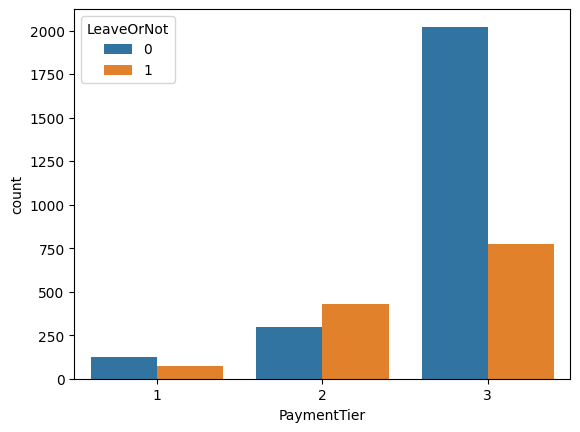

In [31]:
sns.countplot(data=emp_df,
              x="PaymentTier", # ציר האיקס
              hue="LeaveOrNot") #לפי מה הפיצול

זאת לדעתי השאלה הכי מעניינת האם יש קשר בן השכר ליעזוב או לא. אז יש איזשהו קשר  אבל קצת מוזר בדרגת שכר 1 רוב האנשים לא עוזבים את עבודתם אבל לא המווחלט. בדרגת שכר 3 רוב האנשים עוזבים את עבודתם. בדרגת שכר 3 הרוב נשארים

השערה: אם מישהו בדרגת שכר 2 זה אינדקציה שהוא אולי יעזוב

[Text(0.5, 1.0, 'ראות גוס יפל םישנו םירבג לש הקולח')]

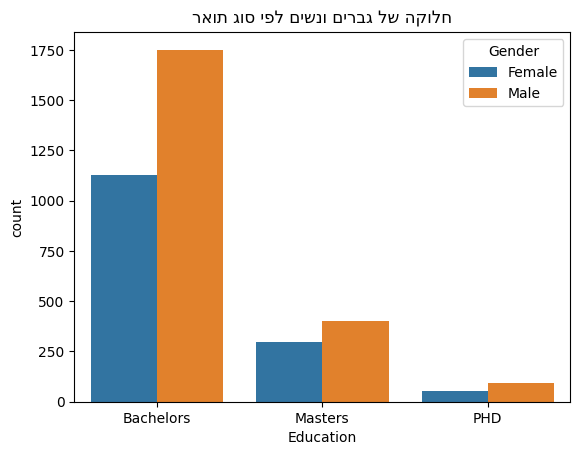

In [32]:
sns.countplot(data=emp_df, x="Education", hue="Gender").set( title="ראות גוס יפל םישנו םירבג לש הקולח")

הסבר לגרף:
משתנים: סוג תואר (קטגוריאלי בדיד) ומין (בוליאני בדיד).
מסקנה: לרוב האנשים יש תואר ראשון, לפחות יש תואר שני והכי מעט בעלי דוקטורט, בלי קשר למין שלהם. אך אצל גברים נראה שיש פער משמעותי יותר בין הכמות של תואר ראשון לתארים מתקדמים.

<Axes: xlabel='City', ylabel='count'>

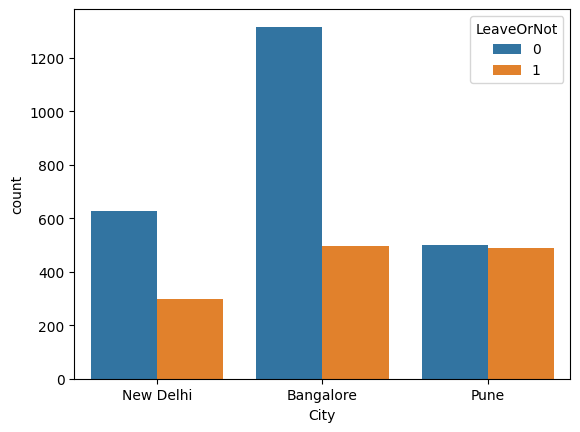

In [33]:
sns.countplot(data=emp_df, x="City", hue="LeaveOrNot")

בבנגלור וניו דלהי רוב העובדים לא עוזבים ובפון חצי חצי

השערה: אם מישהו מגיע מבנגלור או ניו דלהי יש סיכוי גדול שהוא לא יעזוב

C:\Users\isc\AppData\Local\Temp\ipykernel_14936\504587848.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Education", y="Age", data=emp_df,palette='Pastel2').set( title="הספוק םישרת תועצמאב ראות גוס יפל םיאליגה תוגלפתה")


[Text(0.5, 1.0, 'הספוק םישרת תועצמאב ראות גוס יפל םיאליגה תוגלפתה')]

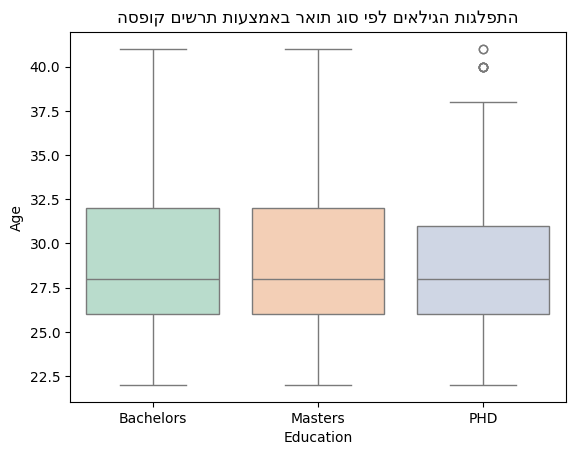

In [34]:
sns.boxplot(x="Education", y="Age", data=emp_df,palette='Pastel2').set( title="הספוק םישרת תועצמאב ראות גוס יפל םיאליגה תוגלפתה")

In [35]:
emp_df.groupby("Education")["Age"].median()

Education
Bachelors    28.0
Masters      28.0
PHD          28.0
Name: Age, dtype: float64

משתנים בדידים - גיל וסוג תואר.
מסקנה: ניתן לראות לפי הגרף שהגיל החציוני זהה (28) בין התארים השונים, וכמו כן הערכים המינימלי והמקסימלי זהים. הרבעון העליון של תואר השני גבוה במעט משני התארים האחרים. ודווקא בגילאים נמוכים יותר יש דוקטורט


C:\Users\isc\AppData\Local\Temp\ipykernel_14936\1656116305.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=emp_df['City'],y=emp_df['Age'],palette='Pastel2')


<Axes: xlabel='City', ylabel='Age'>

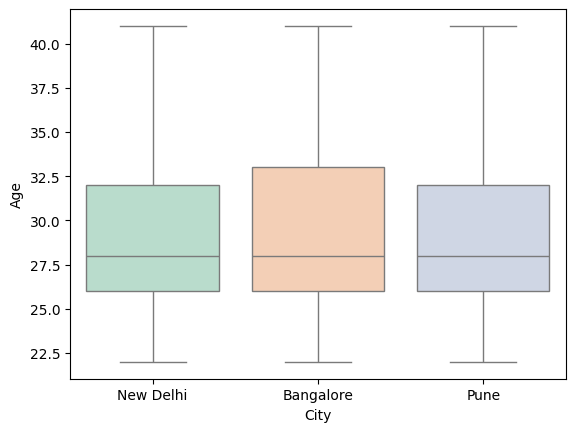

In [36]:
sns.boxplot(x=emp_df['City'],y=emp_df['Age'],palette='Pastel2')


הגיל החציוני שווה אצל כולם

[Text(0.5, 1.0, 'םירע יפל תומושרה זוחא חוליפ')]

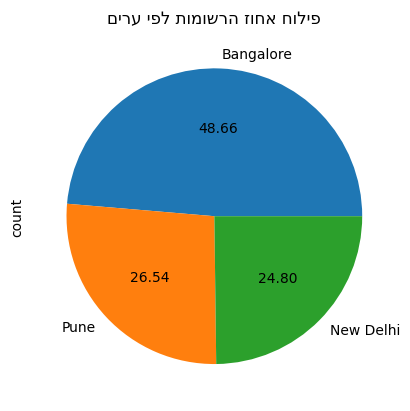

In [37]:
emp_df["City"].value_counts().plot(kind='pie', autopct='%.2f').set(title="םירע יפל תומושרה זוחא חוליפ")

רוב האנשים מהעיר בנגלור יכול להיות שמקום העבודה הראשי נמצא שם

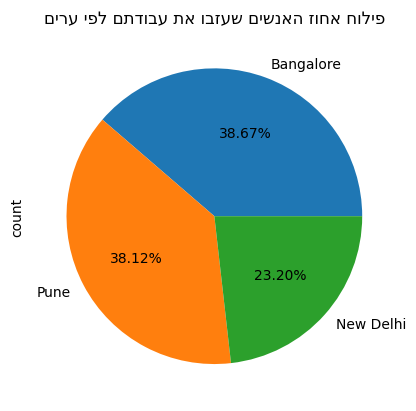

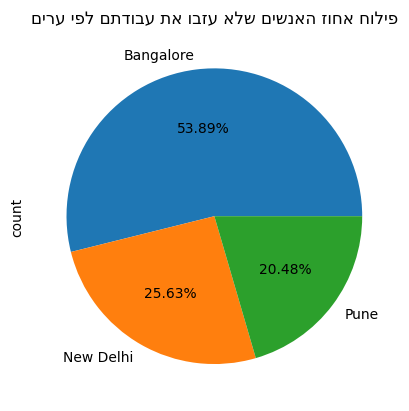

In [38]:
emp_df[emp_df["LeaveOrNot"]==1]["City"].value_counts().plot(kind='pie', autopct='%.2f%%').set(title="םירע יפל םתדובע תא ובזעש םישנאה זוחא חוליפ")

plt.show()


emp_df[emp_df["LeaveOrNot"]==0]["City"].value_counts().plot(kind='pie', autopct='%.2f%%').set(title="םירע יפל םתדובע תא ובזע אלש םישנאה זוחא חוליפ")

plt.show()

רוב האנשים שעוזבים ושלא עוזבים מהעיר בנגלור מכיוון שרוב העובדים מהעיר הזאת .


[Text(0.5, 1.0, 'רכש תוגרד יפל םישנאה זוחא חוליפ')]

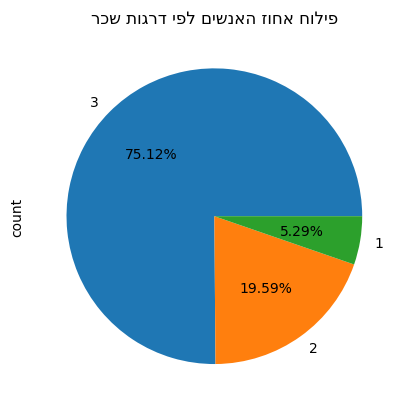

In [39]:
emp_df["PaymentTier"].value_counts().plot(kind='pie', autopct='%.2f%%').set(title="רכש תוגרד יפל םישנאה זוחא חוליפ")

רוב האנשים בדרגת שכר 3 וממש קצת אנשים בדרגת שכר 1

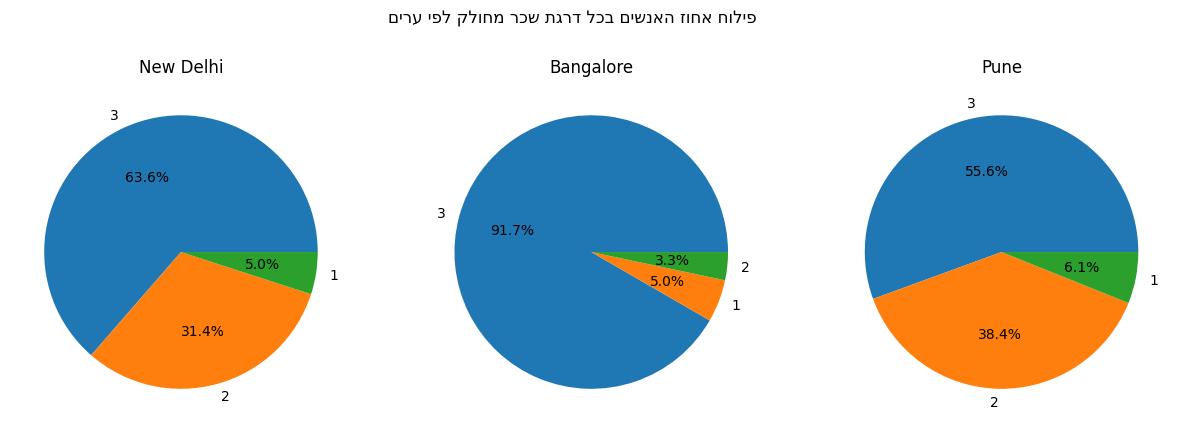

In [40]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i, city in enumerate(emp_df["City"].unique()):
  city_df = emp_df[emp_df["City"] == city]
  payment_tier_counts = city_df["PaymentTier"].value_counts()

  axes[i].pie(
      payment_tier_counts,
      labels=payment_tier_counts.index,
      autopct="%1.1f%%",
  )
  axes[i].set_title(city)
fig.suptitle("םירע יפל קלוחמ רכש תגרד לכב םישנאה זוחא חוליפ")
plt.show()

בגרף זה השתמשנו במשנים של עיר ודרגת השכר ששניהם בדידים.
ניתן לשער מדוע הרבה יחסית אנשים בעיר בנגלור לא עוזבים את עבודתם - בגלל השכר הגבוה, לעומת זאת בפון יחסית לשאר הערים הרבה עוזבים כי לכ-45% יש דרגת שכר 1 או 2 (נמוכה)

<Axes: title={'center': 'ויה אל המכ תמועל הלטבא תפוקתב ויה םישנא המכ רופסל ליג לכל המרגוטסיה'}, xlabel='Age', ylabel='Count'>

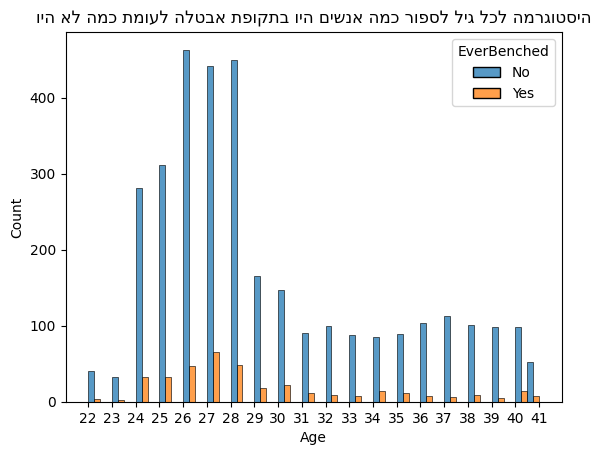

In [41]:
fig = sns.histplot(data=emp_df,x="Age", hue="EverBenched", multiple = "dodge", binwidth=0.5)
fig.set_xticks(range(22,42))
fig.set(title="ויה אל המכ תמועל הלטבא תפוקתב ויה םישנא המכ רופסל ליג לכל המרגוטסיה")
fig

רוב העובדים בלי תלות בגיל, ללא תקופת אבטלה. במיוחד בגילאי ה20 שלהם.

<Axes: xlabel='Age', ylabel='Count'>

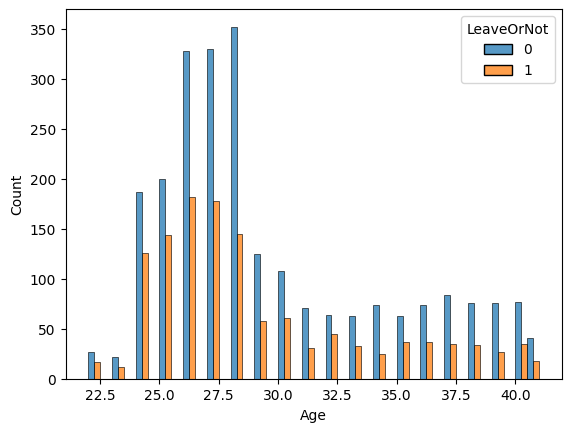

In [42]:
sns.histplot(data=emp_df,x="Age", hue="LeaveOrNot", multiple = "dodge", binwidth=0.5)

בכל גיל רוב האנשים לא עוזבים

<Axes: title={'center': 'רכש תגרד לכב שי םישנא המכ ליג לכל תרפוסה המרגוטסיה'}, xlabel='Age', ylabel='Count'>

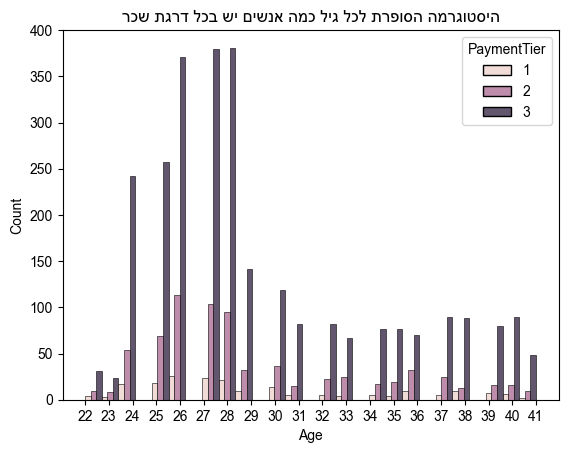

In [43]:
fig = sns.histplot(data=emp_df,x="Age", hue="PaymentTier", multiple = "dodge", binwidth=0.7)
fig.set_xticks(range(22,42))
fig.set(title="רכש תגרד לכב שי םישנא המכ ליג לכל תרפוסה המרגוטסיה")
sns.set(rc={'figure.figsize':(25,10)})
fig



ניתן לראות כי באופן כללי רוב העובדים בגילאי ה-20. וכי סוגי השכר מתפלגים באופן דומה בין הגילאים השונים. כאשר דרגת שכר 3 נפוצה מאוד בגילאי ה20.

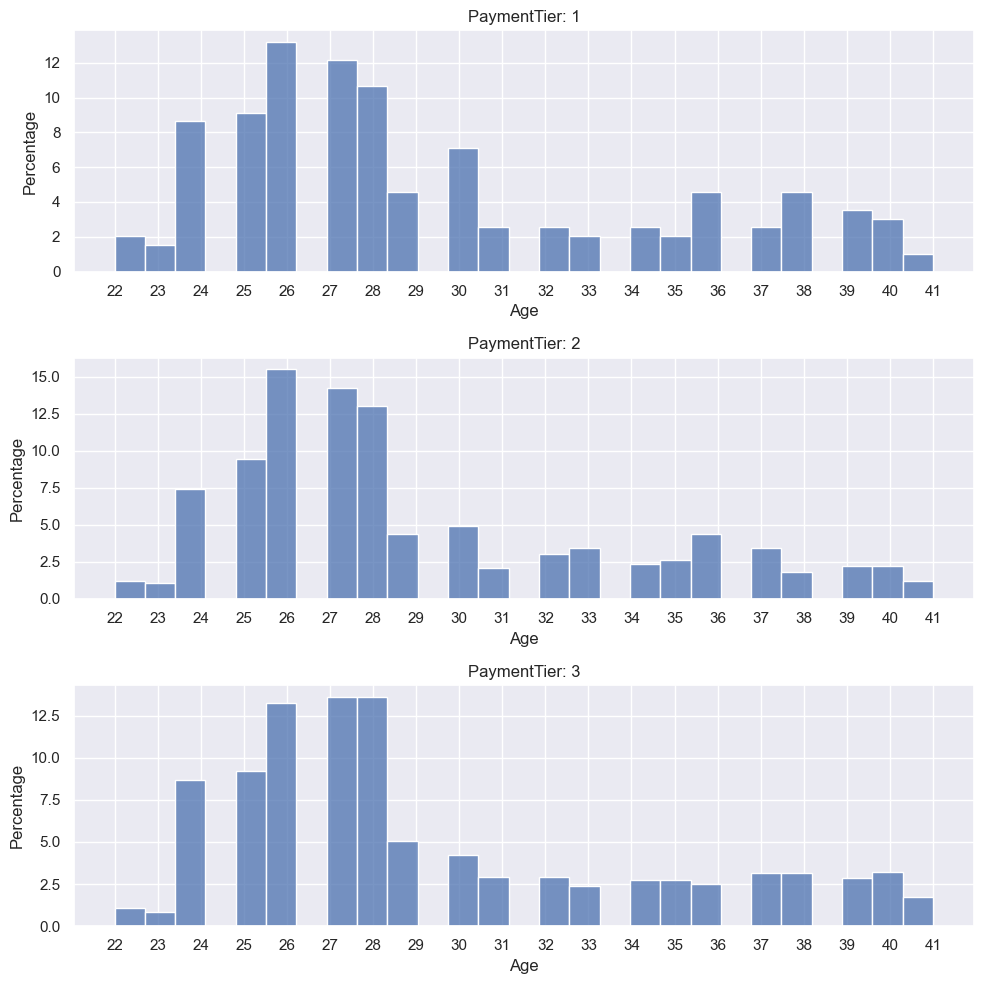

In [44]:
# prompt: show histplot for each PaymentTier that shows the distribution of the Age column, normalized by the number of rows of each PaymentTier

import seaborn as sns
import matplotlib.pyplot as plt

# Get the unique PaymentTier values
payment_tiers = [1,2,3]

# Create a figure with subplots for each PaymentTier
fig, axes = plt.subplots(len(payment_tiers), 1, figsize=(10, 10))

# Iterate over each PaymentTier and create a histogram for the Age column
for i, payment_tier in enumerate(payment_tiers):
  df_filtered = emp_df[emp_df["PaymentTier"] == payment_tier]
  sns.histplot(data=df_filtered, x="Age", ax=axes[i], stat="percent", binwidth=0.7)
  axes[i].set_xticks(range(22,42))
  axes[i].set_title(f"PaymentTier: {payment_tier}")
  axes[i].set_xlabel("Age")
  axes[i].set_ylabel("Percentage")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


גם כאשר מפצלים את ההיסטוגרמה לשלוש היסטוגרמות, אחת לכל קבוצת שכר, רואים בבירור כי יש דמיון באופן ההתפלגות בען הגילאים השונים. דווקא דרגת שכר 1 קצת יותר נפוצה בגילאי 34-40 מאשר דרגת שכר 2 ו-3

הרבה אנשים נכנסים לשוק העבודה בגילאים צעירים (מתחת ל30) ובין גילאי 25-28 המשכורות גבוהות.

[Text(0.5, 1.0, 'רדגמ לכלו רכש תגרד לכל עצוממב ןויסינ תונש')]

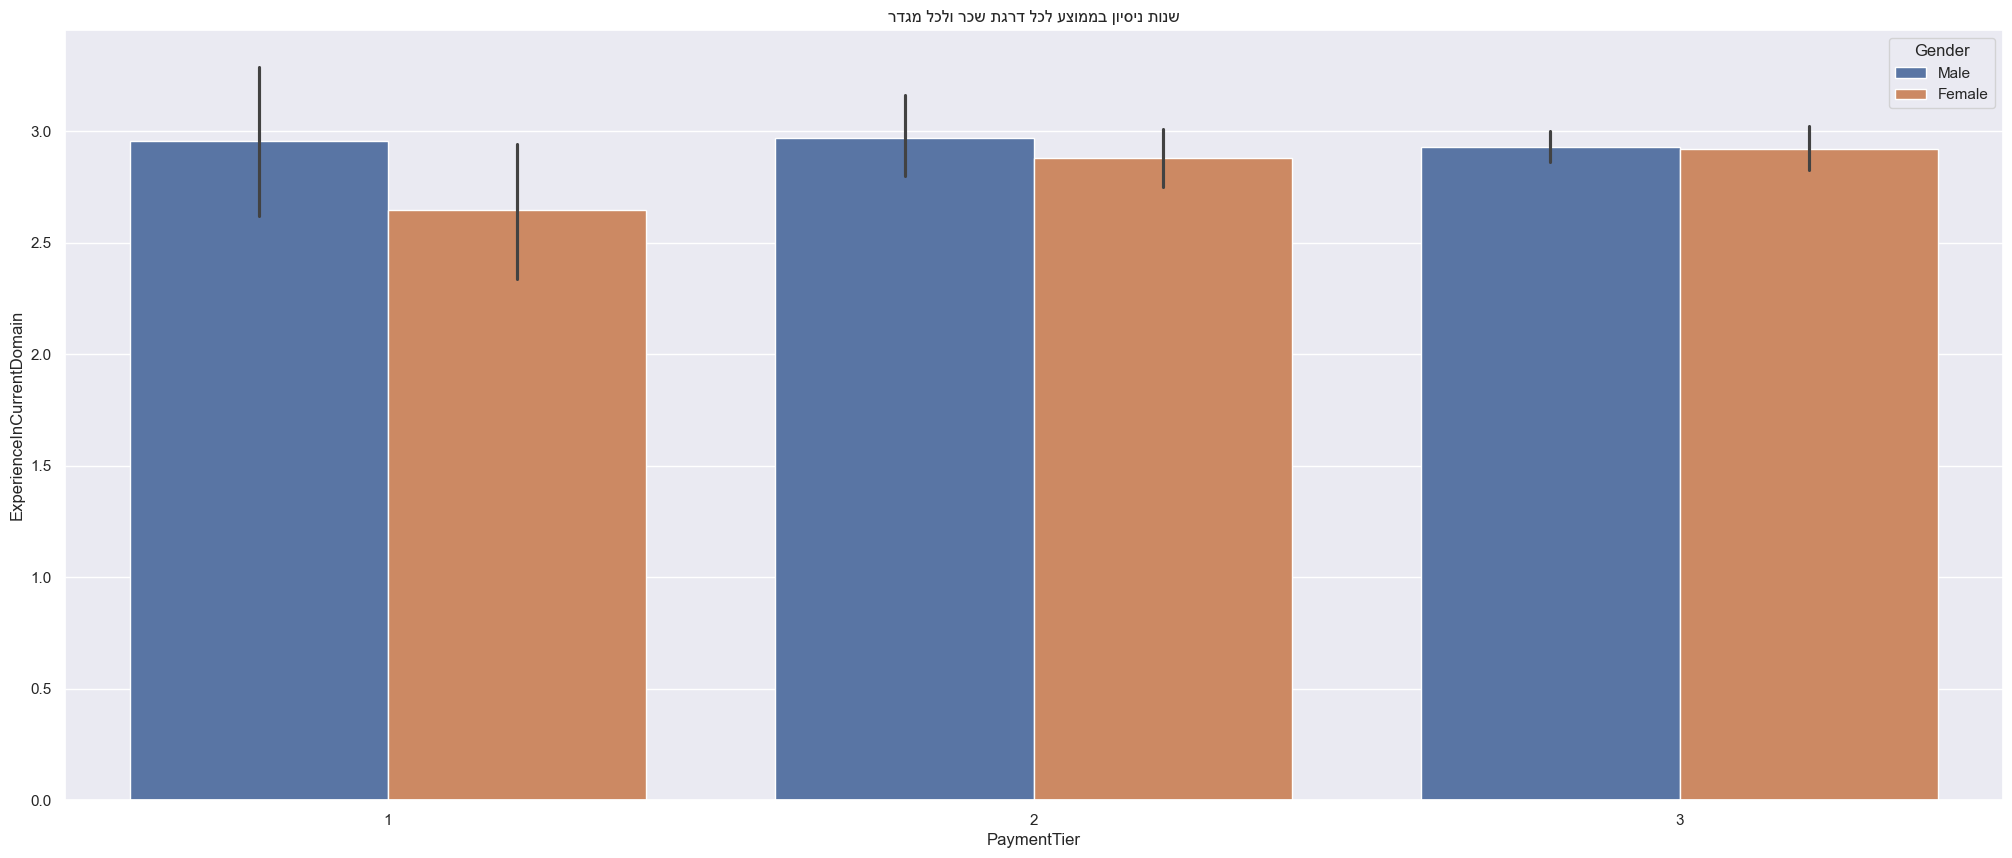

In [45]:
import numpy as np
sns.barplot(data=emp_df, x="PaymentTier", y="ExperienceInCurrentDomain", hue="Gender", estimator=np.mean).set(title="רדגמ לכלו רכש תגרד לכל עצוממב ןויסינ תונש")

רואים שאצל גברים ממוצע שנות הנסיון קבוע יחסית. אצל נשים ממוצע שנות הנסיון עולה (במקצת) ככל שעולה הדרגת שכר.
הסטיית תקן (הקו השחור) יותר גדול ככל שדרגת השכר נמוכה יותר.

In [46]:
emp_df.groupby("PaymentTier")["ExperienceInCurrentDomain"].min()

PaymentTier
1    0
2    0
3    0
Name: ExperienceInCurrentDomain, dtype: int64

1. countplot - כמות של גברים ונשים לפי כל סוג תואר - V
2. displot - לכל גיל כמה היו מובטלים או לא
3. pie chart - כמה אנשים מכל עיר
4. bar plot -  גיל ממוצע לפי דרגת שכר
5. boxplot - התפלגות גיל לפי סוג תואר - V

<Axes: xlabel='JoiningYear', ylabel='Count'>

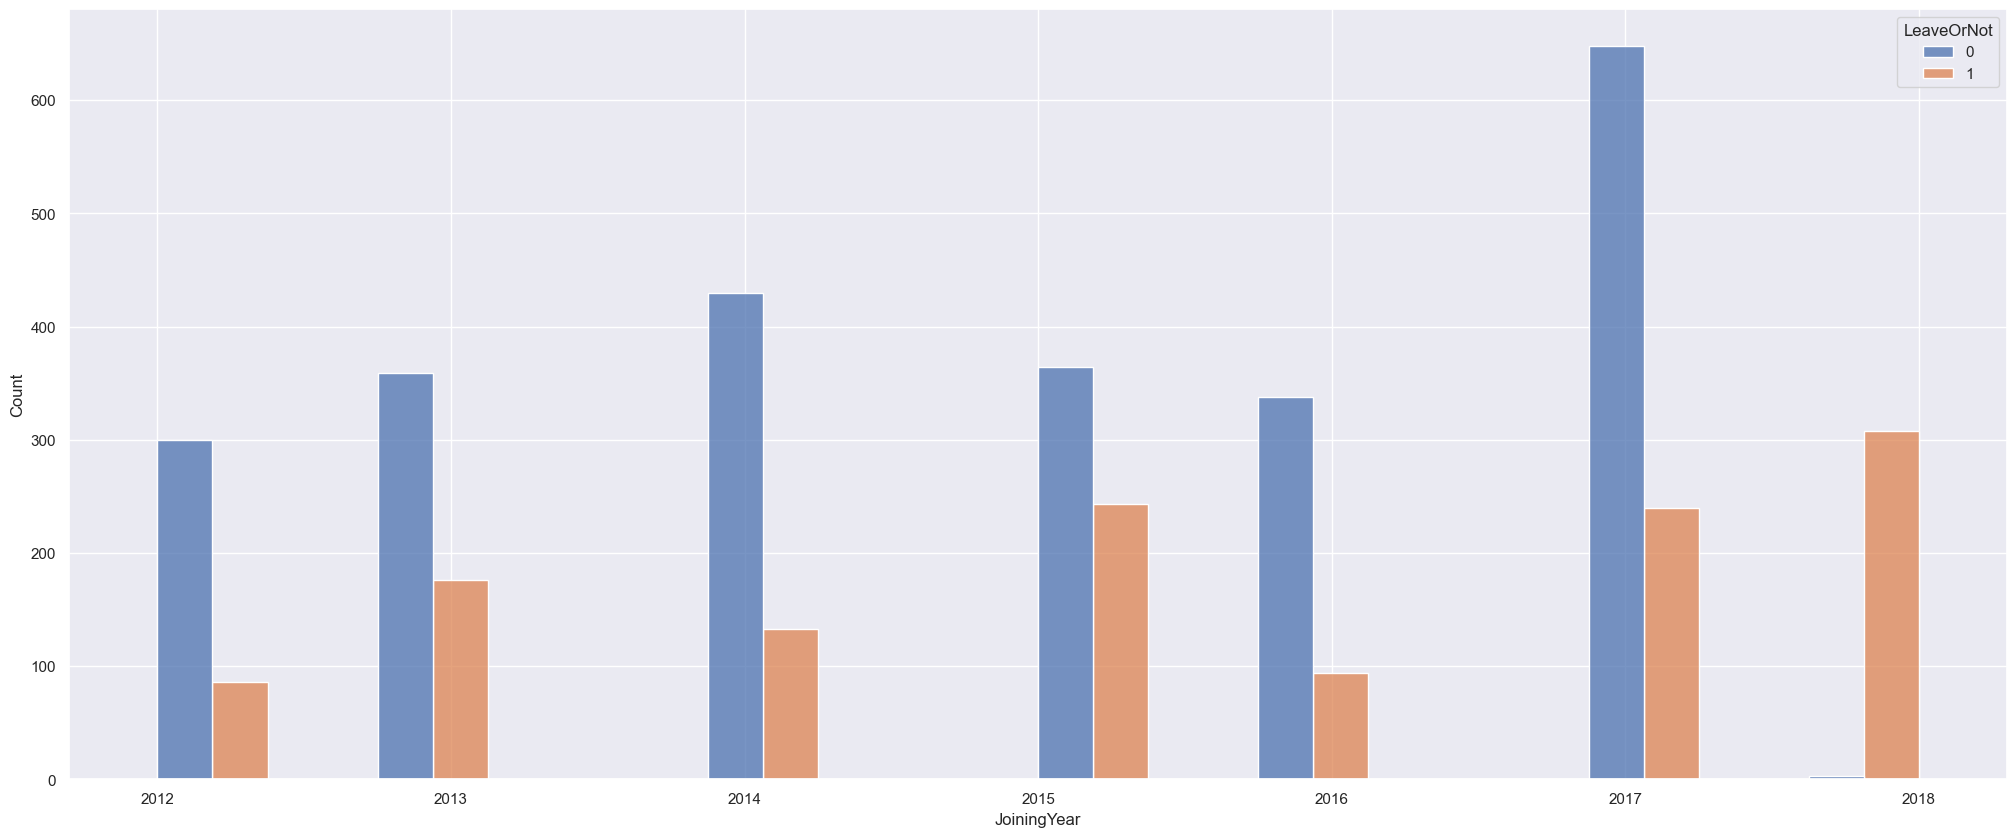

In [47]:
sns.histplot(data=emp_df,x="JoiningYear", hue="LeaveOrNot", multiple = "dodge")

רואים שרוב מי שהצטרף ב2018 עזב.

השערה: אם בן אדם הצטרף בשנת 2018 כנראה שיעזוב



## 4.6 הצגת הקורלציה בין המאפיינים לשאלת המחקר

In [48]:
emp_df.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

In [49]:
emp_df.dtypes

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object

In [50]:
correlation_matrix = emp_df[[ 'JoiningYear', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain', 'LeaveOrNot']].corr()

<Axes: >

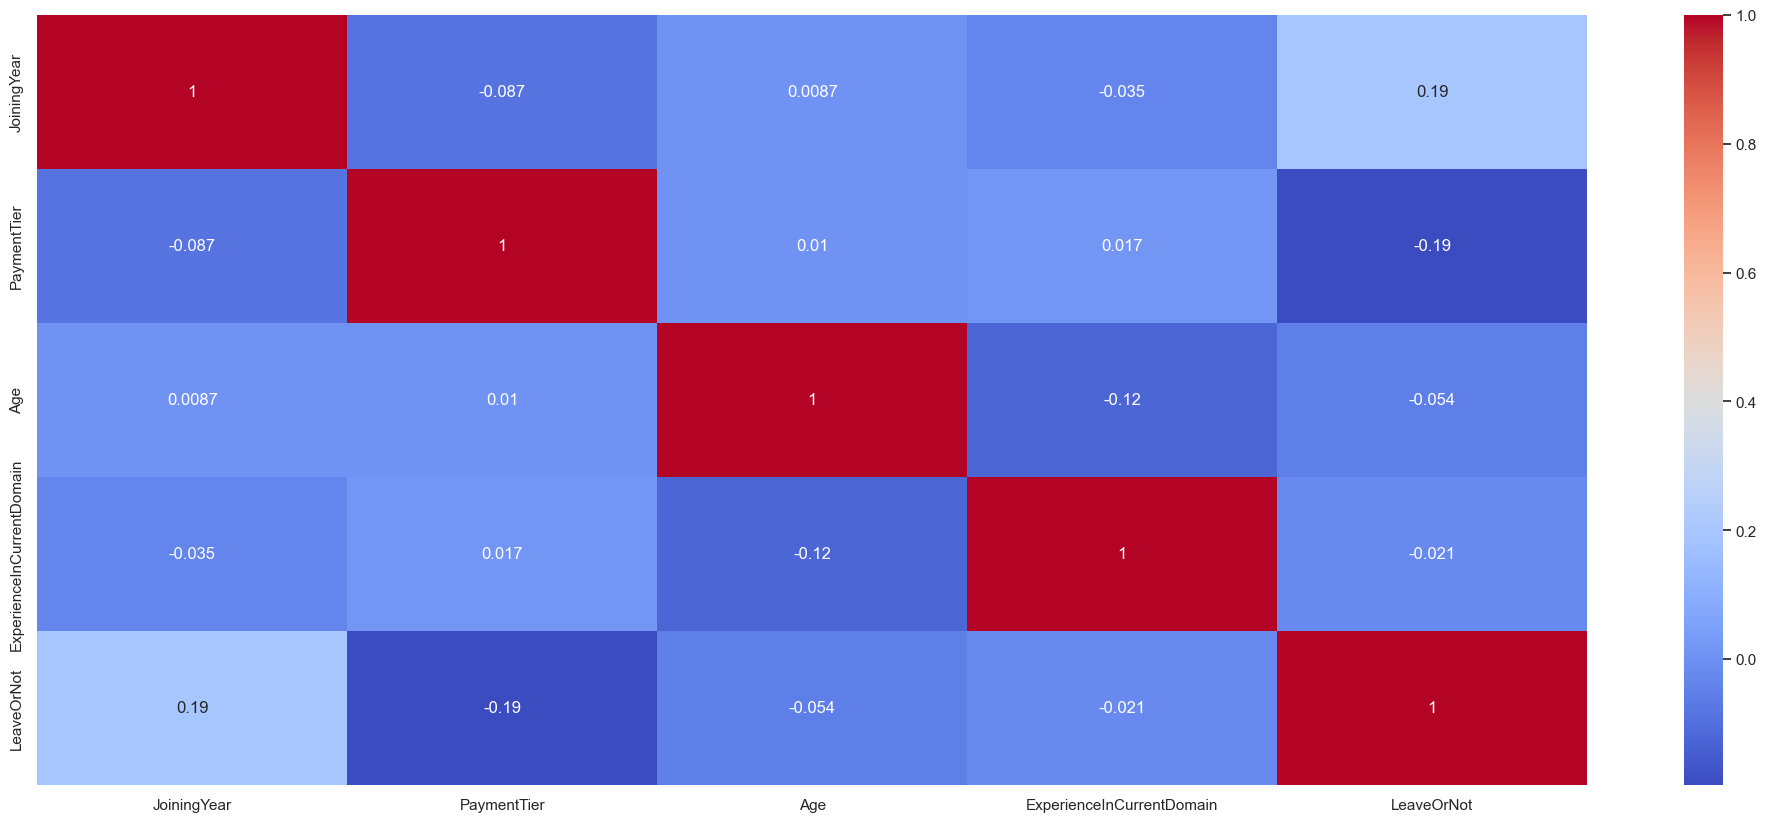

In [51]:
sns.heatmap(correlation_matrix, annot=True, cmap = 'coolwarm' )

כרגע אנחנו נראה קורלציה רק בין משתנים שהם מספריים לפני עיבוד נתונים. מאוחר יותר נראה את הקורלציה גם על שאר העמודות אחרי שנהפוך אותן למספריות.

מסקנות והשערות:



1.   הקורלציה הכי קרובה למינוס 1 היא בין דרגת השכר לאם יעזוב זאת אומרת ככל שדרגת
השכר נמוכה יותר ככה הסיכוי לעזוב גבוהה יותר אבל עדיין זה קורלציה נמוכה

2.   הקורלציה הכי קרובה למינוס 1 היא בין דרגת השכר לאם יעזוב זאת אומרת ככל שדרגת  השכר נמוכה יותר ככה הסיכוי לעזוב גבוהה יותר אבל עדיין זה קורלציה נמוכה

3. הקורלציה בין האם עזב לבין גיל ושנות ניסיון בתחום כמעט שווה ל-0 וזה אומר שהקשר בין המשתנים חלש מאוד

4. מכיוון שאין קורלציה גבוהה (קרובה ל-1 או למינוס 1) בין התכונות לבין שאלת המחקר נוכל להסיק שיש צורך במודל מורכב שמשלב מספר תכונות וכמו כן יש צורך להעשיר את הנתונים עם עוד מידע מעמודות נוספות שלא רואים פה.


ציפיתי שהקורלציה בין שכר נמוך ליעזוב תהיה הרבה יותר גבוהה מכיוון שאחת הסיבות החשובות של עובד לעזוב חברה היא השכר למרות שהקורלציה הזאת בין הגבוהות יחסית לשאר

# .5 עיבוד נתונים - עיבוד וטיוב הנתונים לקראת תהליך הלמידה:


In [52]:
X_train.columns #העמודות

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain'],
      dtype='object')

In [53]:
X_train

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
4097,Bachelors,2012,New Delhi,3,38,Female,No,1
1694,Bachelors,2018,Bangalore,3,26,Male,No,4
2659,Bachelors,2016,Pune,3,27,Male,No,5
3860,Bachelors,2016,Bangalore,3,36,Male,No,4
1250,Bachelors,2017,Bangalore,3,27,Male,Yes,5
...,...,...,...,...,...,...,...,...
2699,Masters,2017,New Delhi,3,27,Male,No,5
1847,Bachelors,2016,Bangalore,3,26,Male,Yes,4
2955,Masters,2015,Pune,3,26,Male,No,4
2148,Bachelors,2014,Bangalore,3,26,Male,No,4


In [54]:
lrn.set_config(transform_output = 'pandas') # כדאי להפוך את הפלט לטבלת פנדס ממערך


## data cleaning - ניקיון .5.1

.5.1.1 זיהוי ערכים חסרים - השלמה או הסרה בהתאם

In [55]:
X_train.isna().sum()  # עמודות עם חסרים

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
dtype: int64

In [56]:
num_cols_to_impute = ["JoiningYear","Age", "ExperienceInCurrentDomain"] # עמודות נומריות להשלים חסרים
cat_cols_to_impute = ["Education","City", "PaymentTier","Gender", "EverBenched"] # עמודות קטיגוריאליות להשלים חסרים

 נמלא חסרים גם בעמודות שבטבלת האימון אין בהם חסרים כי יכול להיות שבטבלת האימות יש. אם יש בטבלת האימות חסרים המודל יקרוס

In [57]:
num_cols_imputation_action = SimpleImputer(strategy = "median") # ממלאים בחסרים בעמודות הנומריות את החציון כדי שיהיה מספר שלם
cat_cols_imputation_action = SimpleImputer(strategy = "most_frequent") # בקטיגוריאליות את הערך הכי שכיח

In [58]:
imputation_parts = [("numerical", num_cols_imputation_action, num_cols_to_impute), #הכי שמאלי שם הטרנספורמר באמצע הפעולה על העמודות בימין שם העמודות
                   ("categorical", cat_cols_imputation_action, cat_cols_to_impute)]

In [59]:
imputer = ColumnTransformer(transformers = imputation_parts,
                            remainder = "passthrough", # שיעביר את העמודות בטרנספורמר שלא העברנו עליהם פעולה ולא ימחק אותן
                            verbose_feature_names_out= False # שלא יוסיף לעמודה את השם של הטרנספורמר למשל "numerical"
                            ,n_jobs = -1) # תשתמש בכל המעבדים הפנויים במחשב שלך כדי לבצע את המשימה. עושים את זה שהקוד ירוץ מהר יותר

<div dir="rtl">כל הפעולות מתבצעות במקביל באמצעות column transformer</div>


In [60]:
imputer

ColumnTransformer(n_jobs=-1, remainder='passthrough',
                  transformers=[('numerical', SimpleImputer(strategy='median'),
                                 ['JoiningYear', 'Age',
                                  'ExperienceInCurrentDomain']),
                                ('categorical',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['Education', 'City', 'PaymentTier', 'Gender',
                                  'EverBenched'])],
                  verbose_feature_names_out=False)

.5.1.2 זיהוי חריגים וטיפול

In [61]:
X_train.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain
count,3722.000000,3722.000000,3722.000000,3722.000000
mean,2015.094035,2.698280,29.368619,2.915637
std,1.863891,0.562696,4.829928,1.556731
min,2012.000000,1.000000,22.000000,0.000000
25%,2014.000000,3.000000,26.000000,2.000000
50%,2015.000000,3.000000,28.000000,3.000000
75%,2017.000000,3.000000,32.000000,4.000000
max,2018.000000,3.000000,41.000000,7.000000


In [62]:
X_train.describe(include='object') #נתונים על עמודות קטיגוריאליות

,Education,City,Gender,EverBenched
count,3722,3722,3722,3722
unique,3,3,2,2
top,Bachelors,Bangalore,Male,No
freq,2879,1811,2246,3348


כפי שניתן לראות בעמודות המספריות המינימום והמקסימום בטווח הגיוני ואין ערכים קיצוניים. בעמודות הקטגוריאליות (השמיות) יש לנו 2-3 קטגוריות ולכן גם אין ערכים חריגים או לא הגיוניים. בכל זאת נשים בגריד סרץ' כדי לראות עם עדיף, עם או בלי

In [63]:
outliers_action = Winsorizer() # הפעולה שמטפלת בחריגים

אם גדול מהאיבר ה95% מחליף אותו באיבר ה95% ואם קטן מהאיבר ה5% מחליף אותו באיבר ה5%

##  איזון תגיות 5.2

In [64]:
y_train.value_counts()

LeaveOrNot
0    2442
1    1280
Name: count, dtype: int64

התגיות יחסית מאוזנות אבל יכול להיות שנאזן אותן במידת הצורך בהמשך

## 5.3 הפיכת משתנים קטיגוריאלים למספריים

בהנחיות זה סעיף 5.5 אבל יותר נוח לי לעשות עכשיו

In [65]:

ord_cat_cols = ['Education','Gender', 'EverBenched'] # עמודות קטיגוריאליות עם סדר טבעי או רק עם שתי קטגוריות
nom_cat_cols = ['City'] # עמודות קטיגוריליות בלי סדר טבעי

In [66]:
ordinal_cat_num_action = OrdinalEncoder(handle_unknown = 'use_encoded_value',unknown_value = -1) # מה שלא מכיר שם -1
nominal_cat_num_action = OneHotEncoder(sparse_output = False, # כל ערך בעמודה הקטיגוריאלית  ללא סדר טבעי מקבל עמודה
                                       handle_unknown = "ignore") # הופך את כל הקטגוריות בעמודה לעמודות של 0 ו 1. 1 אם כן 0 אם לא ומה שלא מכיר מתעלם

<div dir="rtl">לגבי העמודות בסדר הטבעי עם יותר משתי קטגוריות. אצלי הקטגוריות שלעמודת Education הן Bachelors תואר ראשון Masters תואר שני
PHD דוקטורט. ברירת המחדל אם לא אומרים לו מה זה 1,2,3... היא לשים ערכים לפי האלף בית ואצלי במקרה יצא שבתואר הראשון האות הכי מוקדמת באלף בית ואז התואר השני ואז התואר השלישי</div>

In [67]:
cat_numerization_parts  = [
                          ("ordinal", ordinal_cat_num_action, ord_cat_cols),
                           ("nominal",nominal_cat_num_action, nom_cat_cols )]

In [68]:
cat_numerizer = ColumnTransformer(transformers = cat_numerization_parts, remainder = "passthrough", verbose_feature_names_out= False,n_jobs = -1)

<div dir="rtl"> כמו מקודם הכל מתבצע במקביל העמודות המספריות עוברות כמו שהן verbose_feature_names_out משאיר את השמות של העמודות כמו שהן היו</div>


In [69]:
cat_numerizer

ColumnTransformer(n_jobs=-1, remainder='passthrough',
                  transformers=[('ordinal',
                                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['Education', 'Gender', 'EverBenched']),
                                ('nominal',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['City'])],
                  verbose_feature_names_out=False)

## 5.4 הנדסת מאפיינים

כל העמודות בטבלה הם נתונים רלוונטיים לשאלת המחקר ולכן אין לי שום עמודה להוסיף או לשנות

## 5.5 נירמול הנתונים

זה היה אמור להיות ב 5.3 אבל אני מעדיף פה

In [70]:
num_cols_to_standardize = ['JoiningYear', 'Age', 'ExperienceInCurrentDomain'] # נומריות לנירמול
ncat_cols_to_standardize = ['Education','PaymentTier' ] # קטיגוריאליות מספריות לנירמול

In [71]:
num_cols_standardization_action = StandardScaler() #מנרמל לנומריות
ncat_cols_standardization_action =  MinMaxScaler() #מנרמל לקטיגוריאליות

נרצה לנרמל את הנתונים ממספר סיבות.
מודלים של למידת מכונה תלויים בחישובים של מרחק בין וקטורי פיצ'רים, ולא היינו רוצים שפיצ'רים עם ערכים גבוהים (כמו במקרה שלנו שנת הצטרפות לחברה) או טווח ערכים מאוד רחב ישפיעו על המודל הרבה יותר מפיצ'רים עם ערכים נמוכים, שיכולים להיות חשובים לא פחות, כמו למשל דרגת השכר. לכן היינו רוצים שכל הפיצ'רים יהיו בטווח דומה וקטן יחסית. אז למעשה אנחנו נותנים לכל פיצ'ר תרומה שווה, משפרים את ביצועי המודל שלא יהיה מוטה לאף פיצ'ר ומונעים מפיצ'רים להיות דומיננטים מידי..

אנחנו מנסים שני סוגים של נרמול וניתן לגריד סירצ' לבחור:
1. מינימום מקסימום: אנחנו מנרמלים את הדאטה להיות בין 0 ל-1 בכך שאנחנו מחסרים את הערך המינימלי ומחלקים בהפרש בין המקסימום והמינימום כל אחד מהערכים בעמודה.
2. סקיילר סטנדרטי: הופך את הדאטה להתפלג בצורה "נורמלית" עם ממוצע 0 וסטיית תקן של 1. זה נעשה בכך שמחססרים מכל ערך את הממוצע ומחלקים בסטיית תקן הקיימים.

In [72]:
standardization_parts = [("numerical", num_cols_standardization_action, num_cols_to_standardize),
                         ("numericalC", ncat_cols_standardization_action, ncat_cols_to_standardize)]

In [73]:
standardizer =  ColumnTransformer(transformers = standardization_parts, remainder = "passthrough", verbose_feature_names_out= False,n_jobs = -1)

In [74]:
preprocessing_steps = [("impute",imputer ), #ממלא חסרים
                      ("cat_to_num", cat_numerizer), #הופך קטיגוריאלי למספרי
                      ("outliers", outliers_action), #מטפל בחריגים
                       ("standardise",standardizer)] # מנרמל

In [75]:
preprocessor = Pipeline(steps = preprocessing_steps) #פייפליין שבו יש את כל צעדי עיבוד התנתונים
preprocessor

Pipeline(steps=[('impute',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('numerical',
                                                  SimpleImputer(strategy='median'),
                                                  ['JoiningYear', 'Age',
                                                   'ExperienceInCurrentDomain']),
                                                 ('categorical',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Education', 'City',
                                                   'PaymentTier', 'Gender',
                                                   'EverBenched'])],
                                   verbose_feature_names_out=False)),
                ('cat_to_num...
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['City'])],
                                   verbose_feature_names_out=False)),
                ('outliers', Winsorizer()),
                ('standardise',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('numerical', StandardScaler(),
                                                  ['JoiningYear', 'Age',
                                                   'ExperienceInCurrentDomain']),
                                                 ('numericalC', MinMaxScaler(),
                                                  ['Education',
                                                   'PaymentTier'])],
                                   verbose_feature_names_out=False))])

<div dir="rtl">לעומת ה column transformer שמבצע את הפעולות במקביל ה pipeline מבצע אותן אחת אחרי השניה. פה יש לנו pipeline שבתוכו יש מספר column transformers שאחראים על עיבוד הנתונים כל אחד אחראי על שלב אחר. </div>


In [76]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_train_transformed


,JoiningYear,Age,ExperienceInCurrentDomain,Education,PaymentTier,Gender,EverBenched,City_Bangalore,City_New Delhi,City_Pune
4097,-1.660210,1.787302,-1.230717,0.000000,1.0,0.0,0.0,0.0,1.0,0.0
1694,1.559295,-0.697541,0.696658,0.000000,1.0,1.0,0.0,1.0,0.0,0.0
2659,0.486126,-0.490470,1.339116,0.000000,1.0,1.0,0.0,0.0,0.0,1.0
3860,0.486126,1.373162,0.696658,0.000000,1.0,1.0,0.0,1.0,0.0,0.0
1250,1.022710,-0.490470,1.339116,0.000000,1.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2699,1.022710,-0.490470,1.339116,0.546958,1.0,1.0,0.0,0.0,1.0,0.0
1847,0.486126,-0.697541,0.696658,0.000000,1.0,1.0,1.0,1.0,0.0,0.0
2955,-0.050458,-0.697541,0.696658,0.546958,1.0,1.0,0.0,0.0,0.0,1.0
2148,-0.587042,-0.697541,0.696658,0.000000,1.0,1.0,0.0,1.0,0.0,0.0


זו הטבלה אחרי עיבוד הנתונים

In [77]:
X_train # בשביל השוואה בין הטבלאות לוודא שהכל תקין

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
4097,Bachelors,2012,New Delhi,3,38,Female,No,1
1694,Bachelors,2018,Bangalore,3,26,Male,No,4
2659,Bachelors,2016,Pune,3,27,Male,No,5
3860,Bachelors,2016,Bangalore,3,36,Male,No,4
1250,Bachelors,2017,Bangalore,3,27,Male,Yes,5
...,...,...,...,...,...,...,...,...
2699,Masters,2017,New Delhi,3,27,Male,No,5
1847,Bachelors,2016,Bangalore,3,26,Male,Yes,4
2955,Masters,2015,Pune,3,26,Male,No,4
2148,Bachelors,2014,Bangalore,3,26,Male,No,4


## 5.6 הצגת קורלציה

In [78]:
emp_df_transformed = pd.concat([X_train_transformed, y_train], axis=1) #מחבר את עמודת החיזוי עם שאר הטבלה לאחר עיבוד הנתונים
emp_df_transformed

,JoiningYear,Age,ExperienceInCurrentDomain,Education,PaymentTier,Gender,EverBenched,City_Bangalore,City_New Delhi,City_Pune,LeaveOrNot
4097,-1.660210,1.787302,-1.230717,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0
1694,1.559295,-0.697541,0.696658,0.000000,1.0,1.0,0.0,1.0,0.0,0.0,1
2659,0.486126,-0.490470,1.339116,0.000000,1.0,1.0,0.0,0.0,0.0,1.0,0
3860,0.486126,1.373162,0.696658,0.000000,1.0,1.0,0.0,1.0,0.0,0.0,0
1250,1.022710,-0.490470,1.339116,0.000000,1.0,1.0,1.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
2699,1.022710,-0.490470,1.339116,0.546958,1.0,1.0,0.0,0.0,1.0,0.0,1
1847,0.486126,-0.697541,0.696658,0.000000,1.0,1.0,1.0,1.0,0.0,0.0,0
2955,-0.050458,-0.697541,0.696658,0.546958,1.0,1.0,0.0,0.0,0.0,1.0,1
2148,-0.587042,-0.697541,0.696658,0.000000,1.0,1.0,0.0,1.0,0.0,0.0,0


In [79]:
corr_matrix = emp_df_transformed.corr() #טבלת הקורלציה

<Axes: >

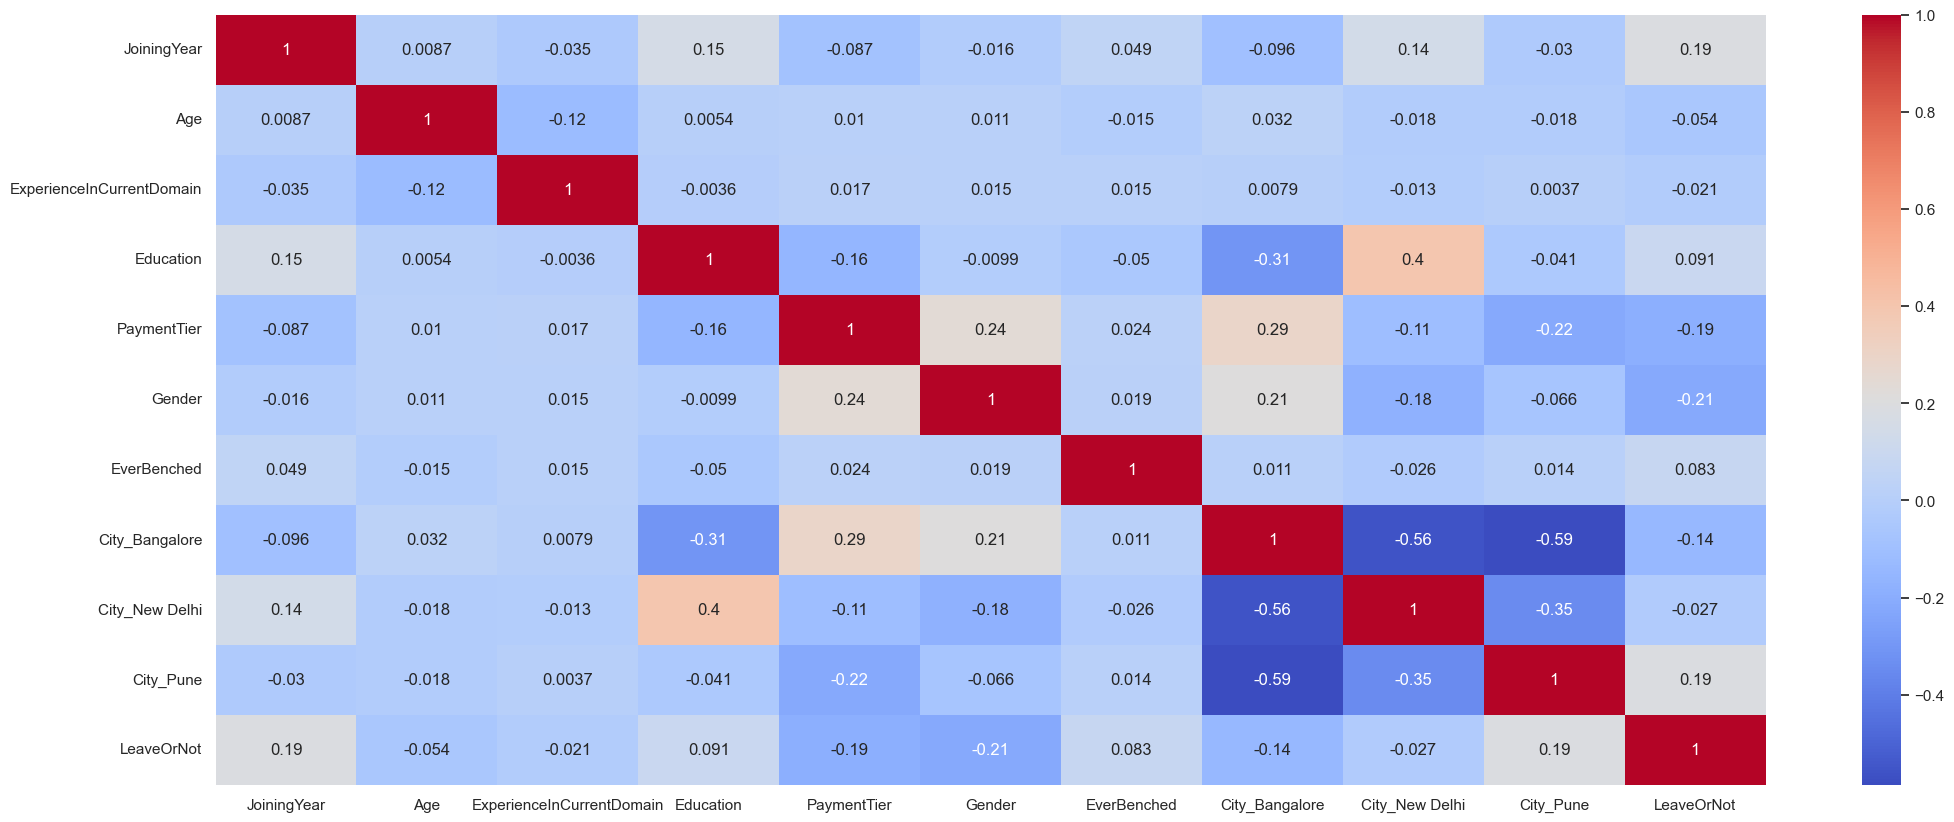

In [80]:
sns.heatmap(corr_matrix, annot=True, cmap = 'coolwarm') #מפת החום

כעת אנחנו מציגים את הקורלציה של כל המשתנים (הפיצ'רים) לאחר העיבוד נתונים שלנו.
1. רואים שהעיר בה עובדים מאוד משפיעה על האם יעזוב או לא ביחס לשאר הפיצ'רים. אנשים בעיר פון יותר סביר שיעזבו ובעיר בנגלור סביר שישארו.
2. גם המשתנה של מין מאוד משפיע ביחס לשאר הפיצרים ונראה שנשים נוטות לעזוב את העבודה.
3. משתנה נוסף חזק זה דרגת השכר, וככל שהדרגה נמוכה יותר יש יותר סיכוי לעזוב את העבודה.
4. עדיין אין אף פיצ'ר עם קורלציה מאוד טובה לשאלת המחקר (הקורלציות הכי גבוהות הן סביב 0.2) ולכן נרצה מודל מורכב שמשתמש במספר פיצ'רים על מנת להגיע לתוצאות טובות

# .6 למידת מכונה:

In [81]:
placeholder_classifier = KNN() # שמים כברירת מחדל

In [82]:
classifying_steps = [("preprocess", preprocessor), #עיבוד הנתונים
                    ("classify", placeholder_classifier)] #סיווג

In [83]:
clf = Pipeline(steps = classifying_steps)

פייפליין חדש צעד ראשון הפייפליין של עיבוד הנתונים צעד שני מסווג

In [84]:
clf

c:\Users\isc\Documents\Python\MLClassification\.venv\Lib\site-packages\sklearn\compose\_column_transformer.py:1624: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocess',
                 Pipeline(steps=[('impute',
                                  ColumnTransformer(n_jobs=-1,
                                                    remainder='passthrough',
                                                    transformers=[('numerical',
                                                                   SimpleImputer(strategy='median'),
                                                                   ['JoiningYear',
                                                                    'Age',
                                                                    'ExperienceInCurrentDomain']),
                                                                  ('categorical',
                                                                   SimpleImputer(strategy='most_frequent'),
                                                                   ['Education',
                                                                    'City',
                                                                    'PaymentTier',
                                                                    'Gender',
                                                                    'EverBenched'])],
                                                    verbose_feature_...
                                                    verbose_feature_names_out=False)),
                                 ('outliers', Winsorizer()),
                                 ('standardise',
                                  ColumnTransformer(n_jobs=-1,
                                                    remainder='passthrough',
                                                    transformers=[('numerical',
                                                                   StandardScaler(),
                                                                   ['JoiningYear',
                                                                    'Age',
                                                                    'ExperienceInCurrentDomain']),
                                                                  ('numericalC',
                                                                   MinMaxScaler(),
                                                                   ['Education',
                                                                    'PaymentTier'])],
                                                    verbose_feature_names_out=False))])),
                ('classify', KNeighborsClassifier())])

פייפליין שבו יש את העיבוד המקדים והסיווג

In [85]:
helpers.identity_transformer.fit_transform(X_train)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
4097,Bachelors,2012,New Delhi,3,38,Female,No,1
1694,Bachelors,2018,Bangalore,3,26,Male,No,4
2659,Bachelors,2016,Pune,3,27,Male,No,5
3860,Bachelors,2016,Bangalore,3,36,Male,No,4
1250,Bachelors,2017,Bangalore,3,27,Male,Yes,5
...,...,...,...,...,...,...,...,...
2699,Masters,2017,New Delhi,3,27,Male,No,5
1847,Bachelors,2016,Bangalore,3,26,Male,Yes,4
2955,Masters,2015,Pune,3,26,Male,No,4
2148,Bachelors,2014,Bangalore,3,26,Male,No,4


כעת נרצה להשתמש בגריד סירצ' על מנת לבחור את המודל הכי טוב עם הפרמטרים הכי טובים.
גריד סירצ' היא שיטה בלמידת מכונה על מנת למצוא את ההיפר פרמטרים הכי טובים עבור מודל מסוים, או לחילופין את המודל הכי טוב מבין מספר מודלים.
אנחנו נגדיר אוסף של אפשרויות של מודלים ופרמטרים לכל מודל (שזה בעצם הגריד) ונבנה הרבה מודלים ונבחר את המודל שנתן את הביצועים הטובים ביותר.
כיצד יודעים מי המודל הטוב ביותר? משתמשים בקרוס וולידציה.

קרוס וולדיציה היא שיטה שבה מחלקים את הדאטה מספר פעמים לקבוצת אימון ואימות ובכל
פעם מאמנים ומודדים על קבוצת האימות. הציון בסוף הוא הממוצע על כל הקבוצות אימות. צריך לומר לקרוס וולידציה על איזה מדד אנחנו רוצים למקסם את התוצאות: אקיוריסי, פרסיז'ן, ריקול או F1 וכו' .


## גריד 1

In [86]:
grid1 = [{
    'preprocess__outliers' :  [helpers.identity_transformer, Winsorizer()], #מחליט אם לטפל בחריגים או לא
    'preprocess__standardise__numerical': [MinMaxScaler(), StandardScaler(), MaxAbsScaler(), RobustScaler()], #מחליט באיזה מנרמל להשתמש
    'preprocess__standardise__numericalC': [MinMaxScaler(), StandardScaler(), MaxAbsScaler(), RobustScaler()],
    'classify' : [KNN()],
    'classify__n_neighbors': [1,10,100] #מכניסים לפרמטר מספרים שונים של מספר שכנים קרובים
},
{
    'preprocess__outliers' :  [helpers.identity_transformer, Winsorizer()],
    'preprocess__standardise__numerical': [MinMaxScaler(), StandardScaler(), MaxAbsScaler(), RobustScaler()],
    'preprocess__standardise__numericalC': [MinMaxScaler(), StandardScaler(), MaxAbsScaler(), RobustScaler()],
    'classify': [SVC(random_state= 42)],
    'classify__C': [0.1,1,10,100], #כמה הוא מתעלם מנקודות חריגות ככל שיותר קטן מתעלם יותר
    'classify__kernel' : ['linear', 'poly', 'rbf', 'sigmoid'] # הצורה למשל קו או אליפסה
}]

בגריד יש שני מילונים אחד לכל מסווג. בכל מילון יש מסווג אחר. בכל מילון עם מסווג יש פרמטרים שחלקם מעיבוד הנתונים וחלקם מהסיווג

In [87]:
# Even though the 'pos_label' parameter is ignored by the scorer
# when the 'average' parameter is not 'binary'
# the scorer still fails for some reason when the 'pos_label'
# parameter is left at its default value of 1.
# It doesn't fail, but issues a warning, when 'pos_label' is set
# to one of the possible values in the target column.
# Setting this parameter equal to None pacifies the scorer.
scorer = make_scorer(f1_score, average= 'macro', pos_label= None)

In [88]:
gs1 = GridSearchCV(estimator=clf,
                  param_grid=grid1,
                  scoring = scorer, # הניקוד שאנחנו רואים
                   n_jobs=-1,
                   verbose= 10,
                   error_score= 'raise')

<p dir="rtl">בחרתי במדד f1 מכיוון שגם ה precision וגם ה recall חשובים כי מצד אחד צריך למצוא את כל העובדים שיעזבו אבל מצד שני אנחנו לא רוצים לסווג מישהו שלא עזב כמישהו שעזב כדאי שלא נחלק למשל סתם בונוסים לאנשים שישארו אפילו שהם בכל מקרה ישארו. וגם בחרתי בmacro כי אני רוצה שהוא יתייחס לשתי הקטגוריות באותה מידה כי זה שהוא יעזוב חשוב באותה מידה כמו שהוא לא יעזוב ואני רוצה להתייחס אליהן בצורה שווה</p>

In [89]:
gs1 = helpers.fit(gs1, X_train, y_train, '1')

original fit duration: 02:11:59


In [90]:
gs1

c:\Users\isc\Documents\Python\MLClassification\.venv\Lib\site-packages\sklearn\compose\_column_transformer.py:1624: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(error_score='raise',
             estimator=Pipeline(steps=[('preprocess',
                                        Pipeline(steps=[('impute',
                                                         ColumnTransformer(n_jobs=-1,
                                                                           remainder='passthrough',
                                                                           transformers=[('numerical',
                                                                                          SimpleImputer(strategy='median'),
                                                                                          ['JoiningYear',
                                                                                           'Age',
                                                                                           'ExperienceInCurrentDomain']),
                                                                                         ('categorical',
                                                                                          SimpleImputer(strategy='most_frequent'),
                                                                                          ['Education',
                                                                                           'City',
                                                                                           'PaymentTier'...
                                                                       func=<function <lambda> at 0x000001CED90FD1C0>),
                                                   Winsorizer()],
                          'preprocess__standardise__numerical': [MinMaxScaler(),
                                                                 StandardScaler(),
                                                                 MaxAbsScaler(),
                                                                 RobustScaler()],
                          'preprocess__standardise__numericalC': [MinMaxScaler(),
                                                                  StandardScaler(),
                                                                  MaxAbsScaler(),
                                                                  RobustScaler()]}],
             scoring=make_scorer(f1_score, response_method='predict', average=macro, pos_label=None),
             verbose=10)

In [91]:
gs1.best_params_ #הקומבינציית ערכים הכי טובה שהגריד סרץ' החליט

{'classify': SVC(random_state=42),
 'classify__C': 10,
 'classify__kernel': 'rbf',
 'preprocess__outliers': Winsorizer(),
 'preprocess__standardise__numerical': StandardScaler(),
 'preprocess__standardise__numericalC': StandardScaler()}

<p dir="rtl">קיבלנו ש ה C  הכי טוב הוא 10 אבל צריך לבדוק אם יש אחד יותר טוב בנוסף יצא שלא צריך לטפל בחריגים כמו שחשבתי

הפרמטר סי כמה מתעלם מחריגים ככל שיותר קטן יותר מתעלם למשל יש אותו על כביש ויש מכשול כמה האוטו יסטה בגלל המכשול

In [92]:
results = gs1.cv_results_
gs1.best_score_
#הציון קרוס וולידציה שהוא נותן לקומבינציה הכי טובה

np.float64(0.8159185219688723)

אחלה ציון אבל ננסה לשפר עוד לכן נעשה עוד גריד עם טווח יותר קטן

## גריד 2

In [93]:
grid2 =[{
   'preprocess__outliers' :  [helpers.identity_transformer, Winsorizer()],
    'preprocess__standardise__numerical': [MinMaxScaler(), StandardScaler(), MaxAbsScaler(), RobustScaler()],
    'preprocess__standardise__numericalC': [MinMaxScaler(), StandardScaler(), MaxAbsScaler(), RobustScaler()],
    'classify': [SVC(random_state= 42)],
    'classify__C': [6,10,30,50],
    'classify__kernel' : ['linear', 'poly', 'rbf', 'sigmoid']
    }]

<p dir="rtl">מכיוון שנבחר בגריד סרץ' הקודם אלגוריתם svc עם פרמטר c=10 ננסה עוד גריד סרץ' שבו יש רק מילון אחד עם אלגוריתם svc  ונקטין את הטווח של הפרמטרים ככה שיש מספרים שיותר קרובים ל10 מ1 או 100</p>

In [94]:
gs2 = GridSearchCV(estimator = clf,
                  param_grid = grid2,
                   scoring = scorer,
                  n_jobs = -1,
                   verbose= 10,
                    error_score= 'raise')

In [95]:
gs2 = helpers.fit(gs2, X_train, y_train, '2')

original fit duration: 01:43:49


In [96]:
gs2

GridSearchCV(error_score='raise',
             estimator=Pipeline(steps=[('preprocess',
                                        Pipeline(steps=[('impute',
                                                         ColumnTransformer(n_jobs=-1,
                                                                           remainder='passthrough',
                                                                           transformers=[('numerical',
                                                                                          SimpleImputer(strategy='median'),
                                                                                          ['JoiningYear',
                                                                                           'Age',
                                                                                           'ExperienceInCurrentDomain']),
                                                                                         ('categorical',
                                                                                          SimpleImputer(strategy='most_frequent'),
                                                                                          ['Education',
                                                                                           'City',
                                                                                           'PaymentTier'...
                                                                       func=<function <lambda> at 0x000001CED90FCF40>),
                                                   Winsorizer()],
                          'preprocess__standardise__numerical': [MinMaxScaler(),
                                                                 StandardScaler(),
                                                                 MaxAbsScaler(),
                                                                 RobustScaler()],
                          'preprocess__standardise__numericalC': [MinMaxScaler(),
                                                                  StandardScaler(),
                                                                  MaxAbsScaler(),
                                                                  RobustScaler()]}],
             scoring=make_scorer(f1_score, response_method='predict', average=macro, pos_label=None),
             verbose=10)

In [97]:
gs2.best_params_

{'classify': SVC(random_state=42),
 'classify__C': 50,
 'classify__kernel': 'rbf',
 'preprocess__outliers': Winsorizer(),
 'preprocess__standardise__numerical': MinMaxScaler(),
 'preprocess__standardise__numericalC': StandardScaler()}

קיבלנו עוד פעם 10 כנראה שצרך לצמצם עוד יותר את הטווח

In [98]:
results = gs2.cv_results_
gs2.best_score_


np.float64(0.8163930285865657)

## גריד 3

In [99]:
grid3 =[{
   'preprocess__outliers' :  [helpers.identity_transformer, Winsorizer()],
    'preprocess__standardise__numerical': [MinMaxScaler(), StandardScaler(), MaxAbsScaler(), RobustScaler()],
    'preprocess__standardise__numericalC': [MinMaxScaler(), StandardScaler(), MaxAbsScaler(), RobustScaler()],
    'classify': [SVC(random_state= 42)],
    'classify__C': [10,14,18],
    'classify__kernel' : ['linear', 'poly', 'rbf', 'sigmoid']
    }]

בגריד סרץ' הקודם קיבלנו שעדיין 10 הפרמטר הכי טוב לכן עכשיו ננסה מספרים שממש קרובים ל10 שיותר קרובים ל10 מאשר 30 או 5

In [100]:
gs3 = GridSearchCV(estimator = clf,
                  param_grid = grid3,
                  scoring = scorer,
                  n_jobs = -1,
                  verbose= 10,
                  error_score= 'raise')

In [101]:
gs3 = helpers.fit(gs3, X_train, y_train, '3')

original fit duration: 00:29:14


In [102]:
gs3

GridSearchCV(error_score='raise',
             estimator=Pipeline(steps=[('preprocess',
                                        Pipeline(steps=[('impute',
                                                         ColumnTransformer(n_jobs=-1,
                                                                           remainder='passthrough',
                                                                           transformers=[('numerical',
                                                                                          SimpleImputer(strategy='median'),
                                                                                          ['JoiningYear',
                                                                                           'Age',
                                                                                           'ExperienceInCurrentDomain']),
                                                                                         ('categorical',
                                                                                          SimpleImputer(strategy='most_frequent'),
                                                                                          ['Education',
                                                                                           'City',
                                                                                           'PaymentTier'...
                                                                       func=<function <lambda> at 0x000001CED90FE160>),
                                                   Winsorizer()],
                          'preprocess__standardise__numerical': [MinMaxScaler(),
                                                                 StandardScaler(),
                                                                 MaxAbsScaler(),
                                                                 RobustScaler()],
                          'preprocess__standardise__numericalC': [MinMaxScaler(),
                                                                  StandardScaler(),
                                                                  MaxAbsScaler(),
                                                                  RobustScaler()]}],
             scoring=make_scorer(f1_score, response_method='predict', average=macro, pos_label=None),
             verbose=10)

In [103]:
gs3.best_params_

{'classify': SVC(random_state=42),
 'classify__C': 14,
 'classify__kernel': 'rbf',
 'preprocess__outliers': FunctionTransformer(feature_names_out='one-to-one',
                     func=<function <lambda> at 0x000001CED90FE160>),
 'preprocess__standardise__numerical': StandardScaler(),
 'preprocess__standardise__numericalC': StandardScaler()}

<p dir="rtl">יצא ש c=14 יותר טוב מc=10 וחוץ מזה הקומבינציות של c=10 וc=14 זהות</p>

In [104]:
results = gs3.cv_results_
gs3.best_score_


np.float64(0.8160347488000855)

כמו שרואים יש שיפור של בערך 0.0013

#.7 חקר ובחינת ביצועים

## 7.2 מדדי הערכת ביצועים ומטריצת בילבול

In [105]:
y_pred = helpers.predict(gs2, X_test)

original predict duration: 00:00:01


In [106]:
report = classification_report(y_test, y_pred,
                               labels = [0,1], target_names = ["not leave", "leave"]) # כדי שידע ש1 זה יעזוב ו0 זה לא יעזוב
print(report)

              precision    recall  f1-score   support

   not leave       0.84      0.96      0.90       611
       leave       0.90      0.64      0.75       320

    accuracy                           0.85       931
   macro avg       0.87      0.80      0.82       931
weighted avg       0.86      0.85      0.85       931



אם אתה מנסה למנוע לסווג מישהו שיעזוב והוא לא וההפך, המודל מעולה. אבל אם אתה מודאג מעובדים שיעזבו, המודל המודל צריך שיפור, במיוחד במציאת אלה שצפויים לעזוב לכן ננסה לשפר את הריקול.

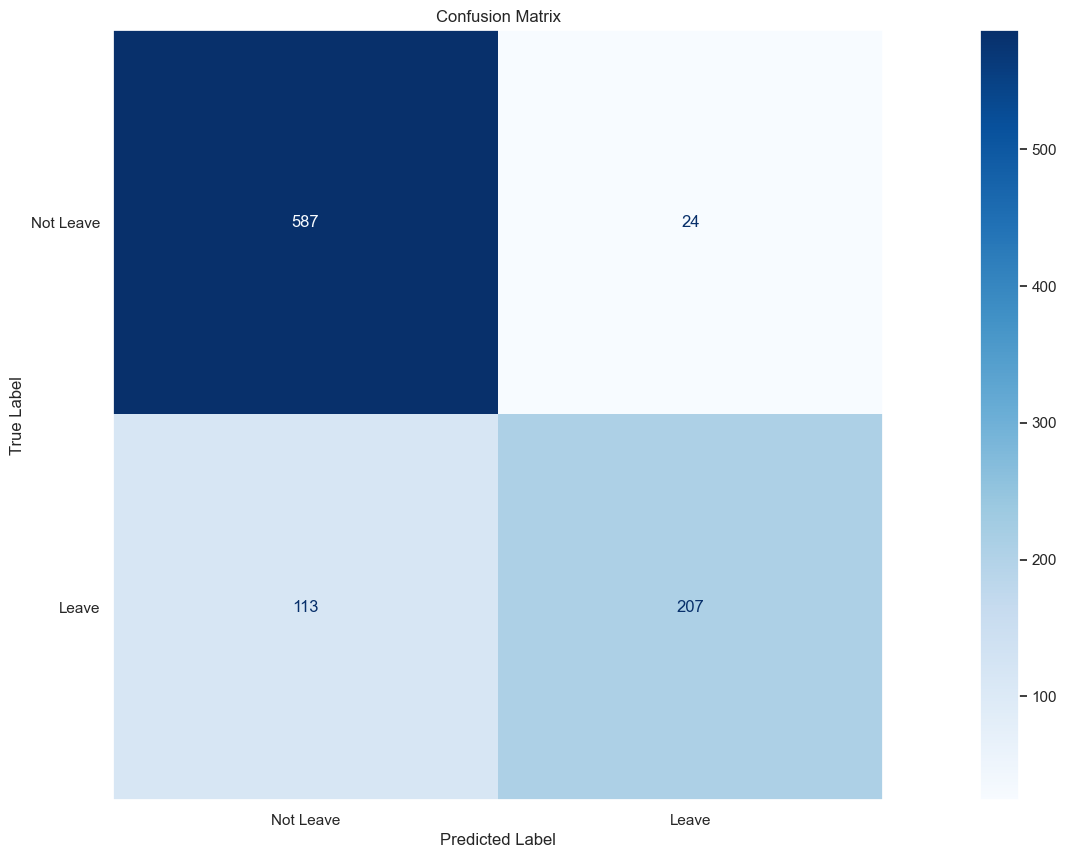

In [107]:
disp = ConfusionMatrixDisplay.from_estimator(gs3.best_estimator_, X_test, y_test, cmap = "Blues")

# Set class labels
disp.ax_.set_xticklabels(['Not Leave', 'Leave'])
disp.ax_.set_yticklabels(['Not Leave', 'Leave'])

# Set title and axis labels
disp.ax_.set_title('Confusion Matrix')
disp.ax_.set_xlabel('Predicted Label')
disp.ax_.set_ylabel('True Label')

# בלי זה יש לי קווים על הדיאגרמה
disp.ax_.grid(False)

# Show plot
plt.show()

נסביר במילים את הדו"ח שקיבלנו:

מדד פרסיז'ן אומר כמה דייקנו בדוגמאות שסיווגנו כ"כן". במקרה שלנו 89% מהאנשים שהמודל אמר עליהם שיעזבו, באמת עזבו. ו84% מהאנשים שאמר עליהם שלא יעזבו אכן לא עזבו.

ריקול אומר כמה דוגמאות הצלחנו להציף כ"כן" מבין מי שהוא באמת כזה. במקרה שלנו מכל האנשים שאכן לא עזבו את העבודה - המודל אמר על 96% שלא יעזבו. ומבין כל האנשים שבפועל עזבו את העבודה המודל הציף רק 65%.

מדד אף-1: מדד זה הוא ממוצע הרמוני של הפרסיז'ן והריקול.

ומדד אקיורסי הוא שיקלול שאומר כמה סיווגנו נכון. כלומר מבין כל הדוגמאות, כל סיווגנו נכון (לא משנה אם ל"עזב" או ל"לא עזב"). במקרה שלנו 85% מכלל הדוגמאות המודל סיווג כנכון. מדד זה יכול להיות בעייתי במקרים שהדאטה לא מאוזן. למשל אם 99% לא עוזבים את העבודה, וניקח מודל טיפש שרק אומר שכולם לא עוזבים אז יהיה לנו 99% אקיוריסי.

בנוסף הדוח גם מראה לנו ממוצע וממוצע משוקלל של כל אחד מהמדדים, ממוצע בין אם מסתכלים על מה שמעניין אותנו כ"עזב" או כ"לא עזב". ממוצע משוקלל מסתכל על הגודל של כמות השליליים והחיוביים.

כמו שרואים המודל מצא את כמעט את כל האנשים שנשארו והיה די מדויק אבל הבעיה שהוא לא מצא הרבה אנשים שעזבו לכן ננסה לשפר

## 7.3 helpers.plot_train_test_scores

In [108]:
ax,best_params = helpers.plot_train_test_scores(gs3, clf, scorer, X_train, X_test, y_train, y_test)

original plot duration: 00:21:07


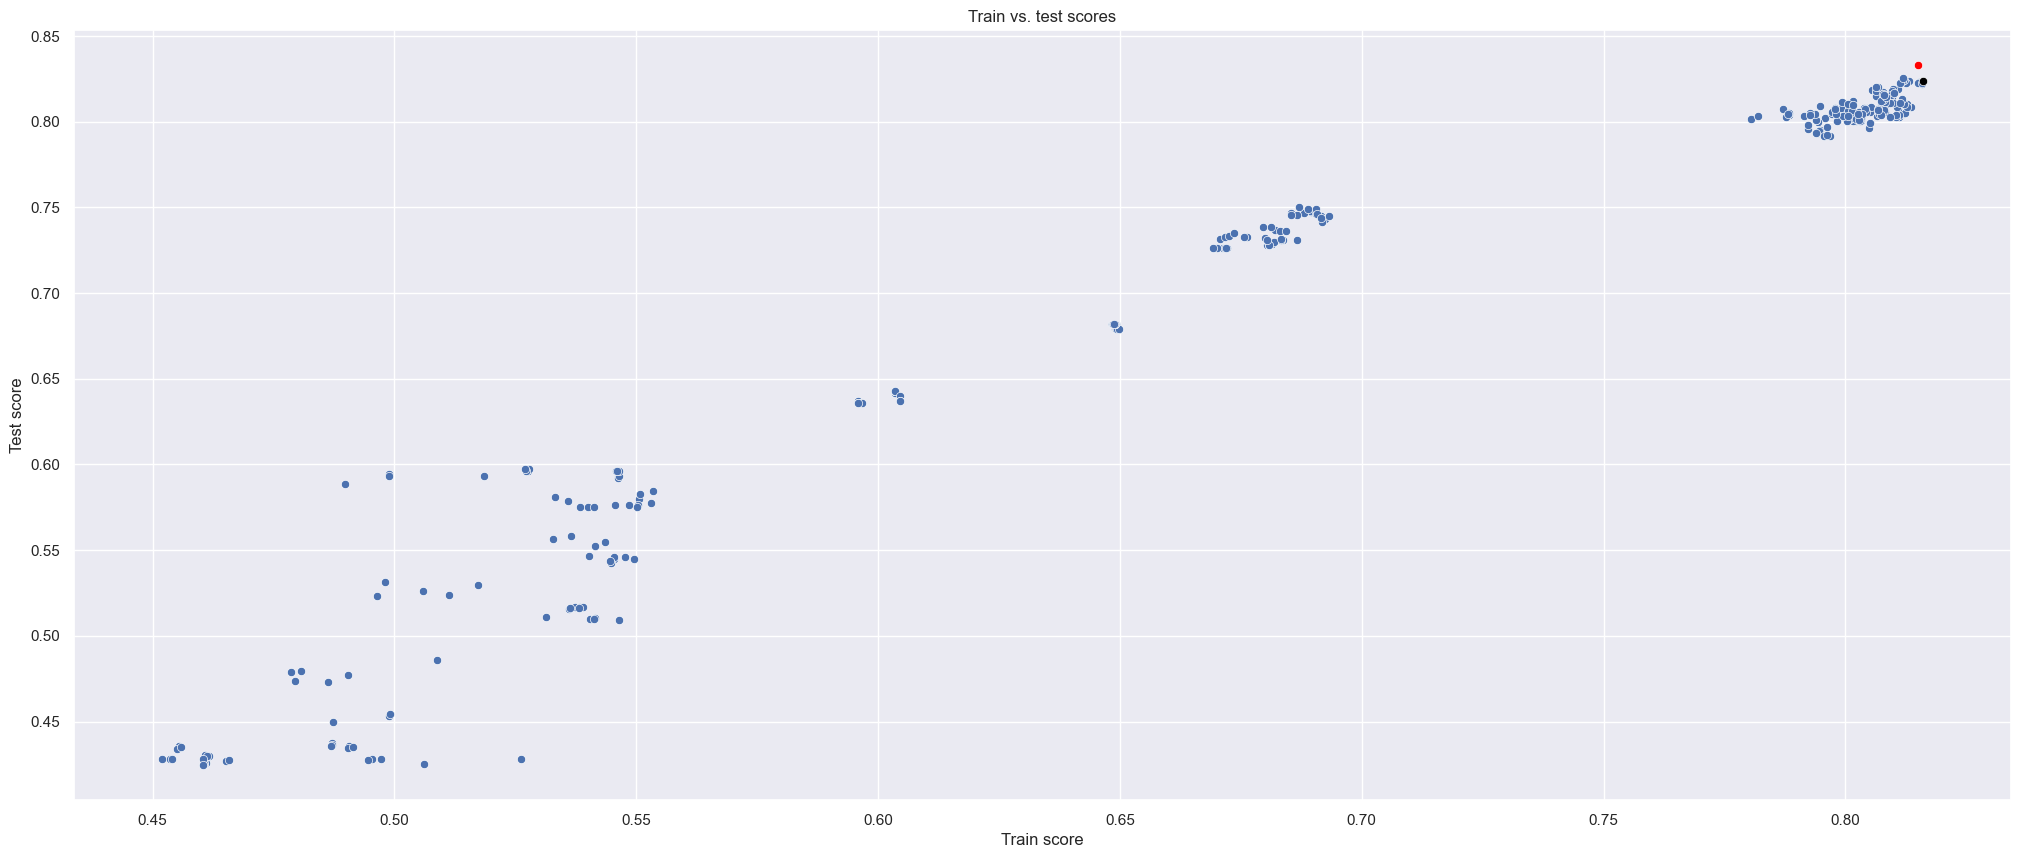

In [109]:
helpers.show_plot(ax)

כל נקודה במערכת הצירים מייצגת קומבינציה של הגריד סרץ'. בציר האיקס יש את הציון של הגריד סרץ'. בציר הוואי יש את האחוז שנחזו נכון. הנקודה האדומה היא הקומבינציה הכי טובה לטבלת האימות והנקודה השחורה הכי טובה לטבלת האימון. יצא שהן קרובות אז  זה סימן טוב כי כנראה אין התאמת יתר. ההבדל בין הניקוד בציר האיקס והוואי שבאיקס זה ניקוד מקרוס וולידציה ובוואי זה ניקוד רגיל

התאמת יתר (אובר פיטינג) הוא מצב בו המודל התאמן יותר מדי כלומר הוא נעול וספיציפי יותר מדי על הנתונים שהוא למד. אם מראים לו דברים שהוא מכיר הוא יצליח ואם מראים לו דברים שהוא לא ראה הוא יכשל. אפשר להשוות את זה לילד בבית ספר יסודי ששינן את לוח הכפל אבל שזה עובר למספרים דו ספרתיים הוא לא מצליח

ג'נרליזציה זה היכולת של המודל להכליל מהדוגמאות שהוא התאמן עליהם לדוגמאות חדשות שהוא לא ראה

In [110]:
best_params['train'] # הקומביניציה הכי טוב לאימון זאת אומרת הפרמטרים הכי טוב של הגריד סרץ שהוא החזיר

{'classify': SVC(C=18, kernel='sigmoid', random_state=42),
 'classify__C': 14,
 'classify__kernel': 'rbf',
 'preprocess__outliers': FunctionTransformer(feature_names_out='one-to-one',
                     func=<function <lambda> at 0x000001CED9A25A80>),
 'preprocess__standardise__numerical': StandardScaler(),
 'preprocess__standardise__numericalC': StandardScaler()}

In [111]:
best_params['test'] # הפרמטרים הכי טובים לטבלת האימות

{'classify': SVC(C=18, kernel='sigmoid', random_state=42),
 'classify__C': 18,
 'classify__kernel': 'rbf',
 'preprocess__outliers': FunctionTransformer(feature_names_out='one-to-one',
                     func=<function <lambda> at 0x000001CED9A25A80>),
 'preprocess__standardise__numerical': StandardScaler(),
 'preprocess__standardise__numericalC': StandardScaler()}

## 7.4 איזון תגיות

זה לא טוב שהתגיות לא מאוזנות מכיוון שלמודל יש יותר דוגמאות שליליות מחיוביות אז המודל מעדיף לצדוק על השליליים במחיר של פגיעה בתוצאות החיוביים

 ננסה לאזן תגיות ונראה אם זה ישפר את המדדים ובמיוחד הריקול למרות שהתגיות לא כאלה לא מאוזנות

In [112]:
y_train.value_counts()

LeaveOrNot
0    2442
1    1280
Name: count, dtype: int64

In [113]:
X_rsm, y_rsm = RandomOverSampler(random_state= 42).fit_resample(X_train, y_train)

איזנו באמצעות רנדום אובר סמפלר שהיא מכפילה שורות עד שהטבלה מאוזנת

In [114]:
y_rsm.value_counts()

LeaveOrNot
0    2442
1    2442
Name: count, dtype: int64

In [115]:
len(X_rsm)

4884

ווידינו שבאמת התגיות נאזנו

### גריד סרץ' על הטבלה המאוזנת

In [116]:
gsB = GridSearchCV(estimator=clf,
                  param_grid=grid3, #העברתי את הגריד של גריד 3
                  scoring = scorer, # הניקוד שאנחנו רואים
                  n_jobs= -1,
                  verbose= 10,
                  error_score= 'raise')

בהתחלה העברתי לגריד סרץ' את הפרמטרים מהגריד הראשון עם שני מהסווגים ואז לפי התוצאות לעשות גרידים נוספים כמו שעשיתי לטבלת האימון הלא מאוזנת. אבל שהעברתי לו את הגריד הראשון הוא רץ לי למשך יותר מ5 שעות ולטבלת האימון רץ רק בערך שעה. לכן החלטתי בלית ברירה להעביר לו את הפרמטרים של הגריד האחרון. אבל אני יודע שצריך לעשות אותו תהליך כמו שעשיתי לטבלת האימון הלא מאוזנת

In [117]:
gsB = helpers.fit(gsB, X_train, y_train, 'B')

original fit duration: 00:29:29


In [118]:
results = gsB.cv_results_
gsB.best_score_

np.float64(0.8160347488000855)

הציון קרוס וולידציה על הטבלה המאוזנת יותר טוב מהציון קרוס וולידציה של הטבלה הלא מאוזנת

In [119]:
gsB

c:\Users\isc\Documents\Python\MLClassification\.venv\Lib\site-packages\sklearn\compose\_column_transformer.py:1624: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(error_score='raise',
             estimator=Pipeline(steps=[('preprocess',
                                        Pipeline(steps=[('impute',
                                                         ColumnTransformer(n_jobs=-1,
                                                                           remainder='passthrough',
                                                                           transformers=[('numerical',
                                                                                          SimpleImputer(strategy='median'),
                                                                                          ['JoiningYear',
                                                                                           'Age',
                                                                                           'ExperienceInCurrentDomain']),
                                                                                         ('categorical',
                                                                                          SimpleImputer(strategy='most_frequent'),
                                                                                          ['Education',
                                                                                           'City',
                                                                                           'PaymentTier'...
                                                                       func=<function <lambda> at 0x000001CED9A27740>),
                                                   Winsorizer()],
                          'preprocess__standardise__numerical': [MinMaxScaler(),
                                                                 StandardScaler(),
                                                                 MaxAbsScaler(),
                                                                 RobustScaler()],
                          'preprocess__standardise__numericalC': [MinMaxScaler(),
                                                                  StandardScaler(),
                                                                  MaxAbsScaler(),
                                                                  RobustScaler()]}],
             scoring=make_scorer(f1_score, response_method='predict', average=macro, pos_label=None),
             verbose=10)

In [120]:
gsB.best_params_

{'classify': SVC(C=18, kernel='sigmoid', random_state=42),
 'classify__C': 14,
 'classify__kernel': 'rbf',
 'preprocess__outliers': FunctionTransformer(feature_names_out='one-to-one',
                     func=<function <lambda> at 0x000001CED9A27740>),
 'preprocess__standardise__numerical': StandardScaler(),
 'preprocess__standardise__numericalC': StandardScaler()}

### מדדים על הטבלה המאוזנת

In [121]:
y_predB = helpers.predict(gsB, X_test, 'B')

original predict duration: 00:00:01


In [122]:
report = classification_report(y_test, y_predB, labels = [0,1], target_names = ["not leave", "leave"])
print(report)

              precision    recall  f1-score   support

   not leave       0.84      0.96      0.90       611
       leave       0.90      0.65      0.75       320

    accuracy                           0.85       931
   macro avg       0.87      0.80      0.82       931
weighted avg       0.86      0.85      0.85       931



כמו שרואים הריקול של יעזוב עלה באופן משמעותי מצד שני הריקול של לא יעזוב ירד אבל עדיין הוא מאוד גבוה. הפרסיזן של יעזוב ירד אבל של לא יעזוב עלה. כל מדדי אף1 עלו גם הם. הדבר הכי חשוב הוא שהריקול מאוד עלה כי מכיוון עכשיו הסיכוי שנפספס עובדים שעזבו הרבה יותר נמוך לכן נעדיף את המודל עם התגיות המאוזנות

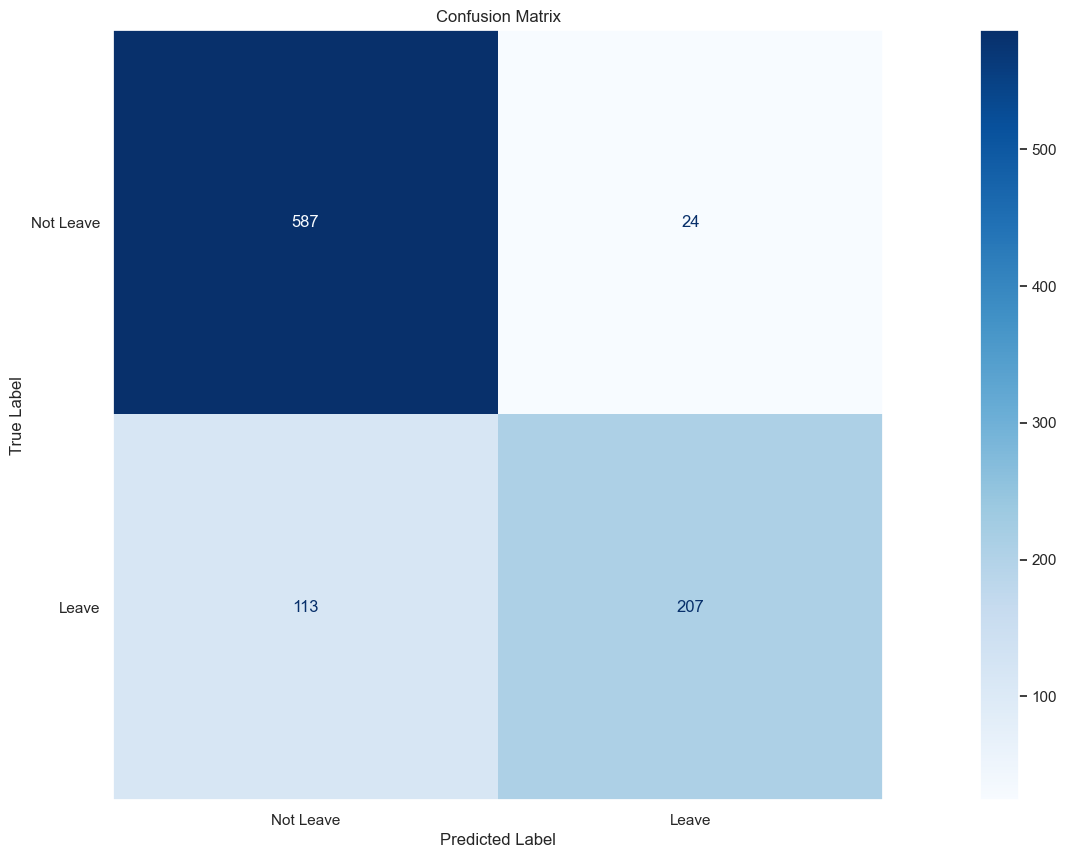

In [123]:
disp = ConfusionMatrixDisplay.from_estimator(gsB.best_estimator_, X_test, y_test, cmap = "Blues")

# Set class labels
disp.ax_.set_xticklabels(['Not Leave', 'Leave'])
disp.ax_.set_yticklabels(['Not Leave', 'Leave'])

# Set title and axis labels
disp.ax_.set_title('Confusion Matrix')
disp.ax_.set_xlabel('Predicted Label')
disp.ax_.set_ylabel('True Label')

disp.ax_.grid(False)

# Show plot
plt.show()

המודל זיהה הרבה יותר אנשים שעזבו והוא זיהה קצת פחות אנשים שלא עזבו.

# 8 סיכום

## .8.1 מסקנות לגבי הנתונים שנבחרו, השערות והסברים לגבי הביצועים.

הנתונים בטבלה בצורה הראשונית שלהם היו מורכבים מידי בשביל לבנות מהם מודל טוב.
היינו צריכים לעשות עיבוד לנתונים ולהרכיב עמודות חדשות באמצעות הנתונים הקיימים ולשנות ערכים מילוליים לערכים מספריים על מנת שמודל יוכל ללמוד מהם.
ניסיתי באמצעות גריד סירצ' לבחור את המודל הטוב ביותר מבין שני מודלים עם כמות  גדולה של פרמטרים שונים וככה הצלחתי לשפר את הביצועים של המודל ולהגיע לחיזוי ברמה גבוה יחסית עם מדדים שאני מרוצה מהם (הרבה יותר טובים ממודל רנדומלי).
בהתחלה לא הייתי מרוצה מהמדד של הריקול שהיה עבור האנשים שיעזבו את העבודה,
לכן החלטתי לאזן את התגיות מכיוון שהיה לי חשוב לדעת מי יעזוב את העבודה יותר מאשר מי לא יעזוב, והתגיות של מי יעזוב היו רק שליש מהדאטה. ככה הצלחתי לשפר את מדד הריקול, בעוד 10%!

המודל יכול לשמש חברות שחשוב להן לדעת מראש ולחזות איזה עובדים מתכוונים לעזוב את העבודה ואיזה לא. בצורה כזאת הם יוכלו לדעת לתגמל עובדים שעומדים לעזוב ולגרום להם להשאר ומצד שני לא לתגמל בטעות עובדים שלא מתכוונים לעזוב למשל. כמובן שלכל חברה יש את הנתונים שלה ונצטרך לבנות מודל דומה עם הנתונים של חברה אחרת.

## .8.2 רפלקציה אישית

לא בחרתי את הטבלה עם הרבה חשיבה פשוט ראיתי טבלה שמתאימה לדרישות אז בחרתי בה. כמעט את כל החומר חוץ מהנושא שעשיתי עליו מצגת שהוא ספריית סיבורן ואצלנו זה פרק 4 למדתי תוך כדי עבודה מכיוון שפיספסתי הרבה שיעורים כי היו לי מתכונות ומבחנים בבר אילן.
עד סוף פרק 4 העבודה הייתה לי די פשוטה מכיוון שזה הנושא שעשיתי עליו את המצגת.

 את פרק 5 התחלתי התחלתי לעשות ידנית אבל גיליתי שצריך להשתשמש במחלקות פייפיליין וקולמן טרנספורמר. קצת נלחצתי כי גם חשבתי שכל העבודה שלי הלכה לטמיון וגם לא הבנתי את הנושא ממש טוב. לשמחתי עשיתי שיעור עם איתי וצפיתי בסירטונים ובזכות זה גיליתי שהנושא לא כזה קשה, הבנתי אותו והצלחתי לעשות את 5 עם עזרה של איתי.

פרק 6 התחיל קל כי חשבתי שזה סך הכל לעשות גריד סרץ' רק שלושה תאים. גיליתי שזה הרבה יותר מזה מכיוון שההפרשים בין הערכים של הפרמטרים היו ממש גבוהים וצריך בכל פעם לצמצם בגריד נוסף את הפרמטרים ההערכים שלהם. בנוסף בהתחלה בחרתי את הניקוד של הגריד סרץ' בלי הרבה חשיבה (בהתחלה אקייורסי) אבל גיליתי שזה משמעותי ושיניתי את הניקוד לניקוד שלדעתי הכי  מתאים למודל שהוא אף 1. גם לקח לי הרבה זמן לסיים את 6 כי עשיתי שלושה גרידים שכל אחד רץ בערך במשך שעה

גם חשבתי בהתחלה שפרק 7 קל כי זה סך להפעיל איזה כמה פונקציות פשוטות. אבל שהסתכלתי על המדדים לא הייתי מרוצה מחלק מהם לכן החלטתי לאזן תגיות. הצלחתי לאזן די בקלות אבל הרצת הגריד לקחה 5 שעות לכן הפסקתי אותה ונאלצתי לעשות את הגריד
השלישי עליה. עם זאת סך הכל המדדים השתפרו במיוחד הריקול

הנושא שהכי עניין אותי זה הגריד סרץ' כי התלהבתי מזה שהוא מחשב לכל קומבינציה בגריד ניקוד ובוחר את הקומבינציה הכי טובה במקום שאנחנו נעשה את זה. אני חושב שזה גם הנושא שהכי התעמקתי בו והשקעתי בו בפרויקט

לסיכום, מאוד נהנתי לעשות את הפרויקט נהנתי מכל חלק שלו גם שהיה קל וגם שהיה קשה. אני מאוד מעריך את איתי על זה שהוא היה עוזר לנו בזום באופן קבוע כל פעם שהיינו צריכים ובכללי שהוא עזר